In [1]:
import numpy as np
import pandas as pd

In [2]:
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity="all"
InteractiveShell.ast_node_interactivity="last"

# Seaborn

- https://seaborn.pydata.org/
- matplotlib의 기능에 스타일을 확장한 파이썬 시각화 도구
- high-level interface
- 패키지는 설치해야 함(pip install seaborn)
    - 아나콘다에 seaborn 패키지 포함되어 있으므로 이미 설치되어 있음
- seaborn을 사용하기 위해서는 matplotlib가 import 되어 있어야 함

## 패키지 임포트

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# 한글 폰트 지원
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## 지원되는 플롯 유형

- Relational plots
- Distribution plots
- Categorical plots
- Regression plots
- Multi-plot grids
- Figure theming
- Color palettes


- https://seaborn.pydata.org/examples/index.html
- https://seaborn.pydata.org/tutorial.html

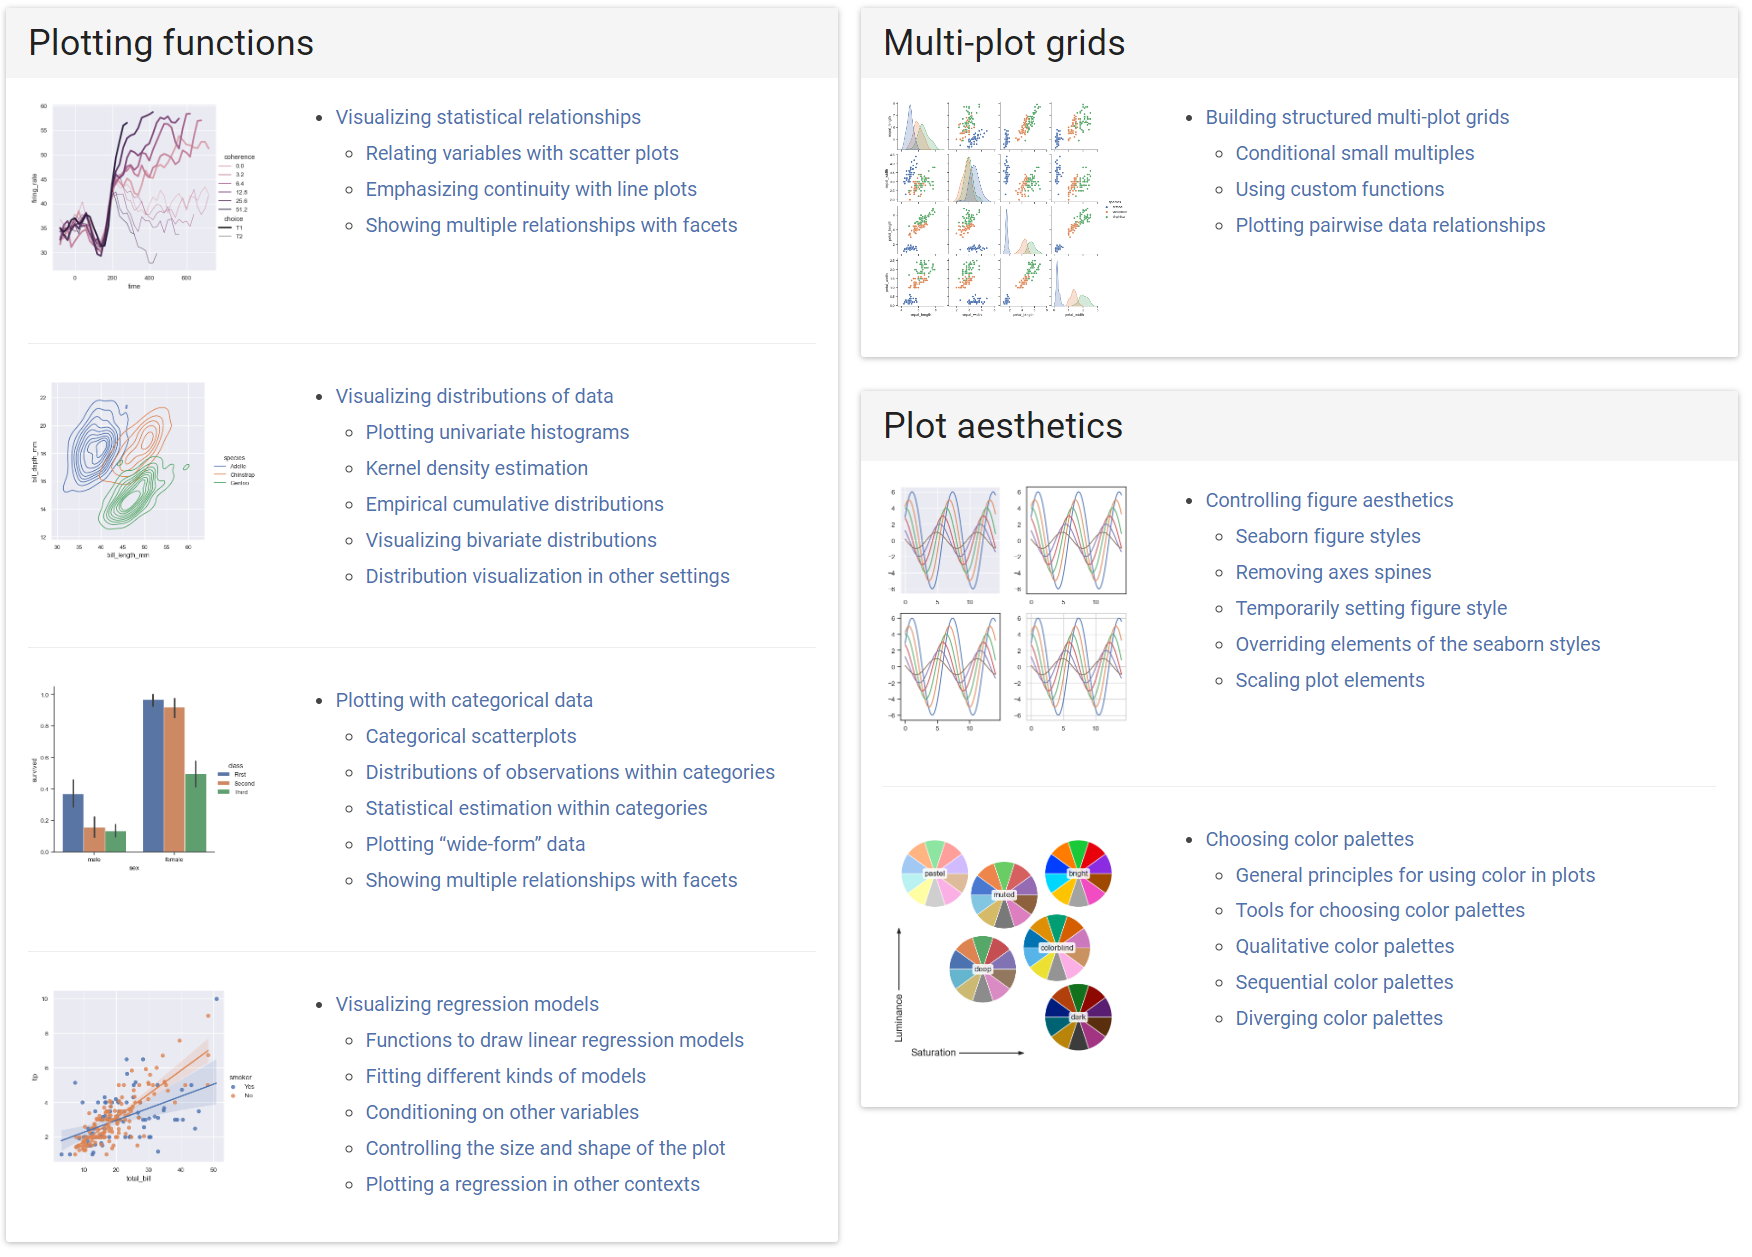

#### 데이터 시각화(visualization)

- 데이터를 보기 쉽게 그림으로 표현한 것이 그래프(graph)
- 데이터의 변수의 수, 종류, 분석 목적에 따라 시각화 도구가 달라짐

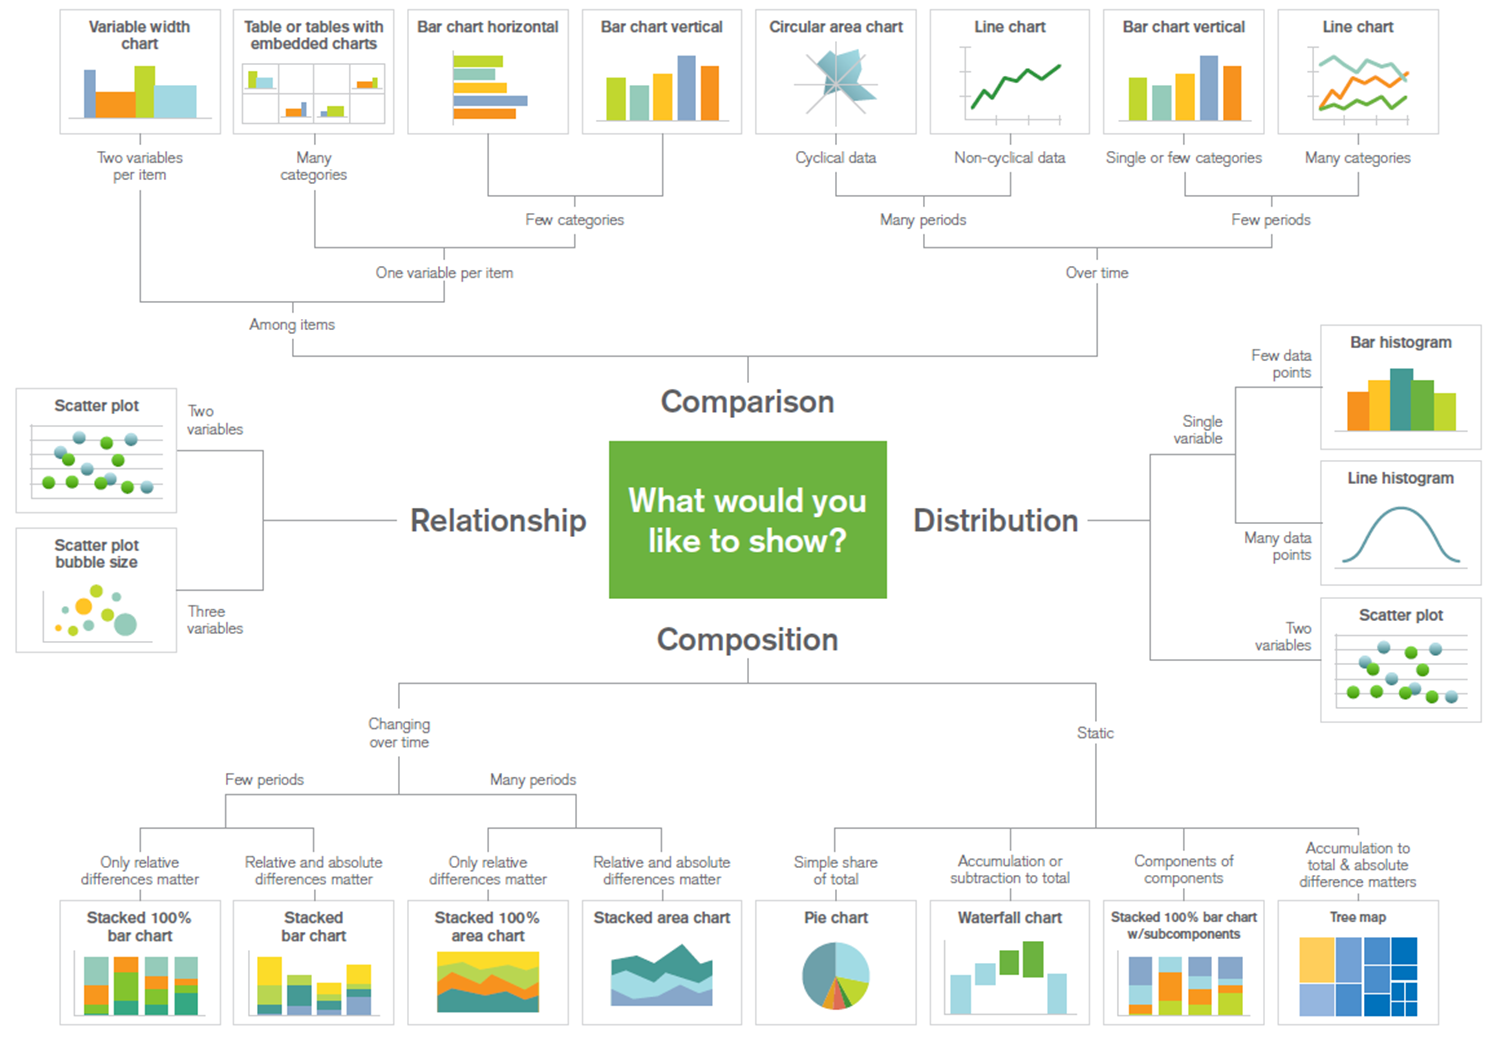

출처: https://blog.qlik.com/third-pillar-of-mapping-data-to-visualizations-usage

------------------------

# 시각화의 목적에 따른 플롯

## 1. 데이터 분포(distribution) 파악

- 데이터의 중심(대표), 산포(퍼짐), 왜도, 첨도 등의 분포 특징을 파악하기 위해 사용


- 히스토그램(histogram)
    - matplotlib.pyplot.hist()
    - seaborn.displot(kind='hist')
    - seaborn.histplot()
    - DataFrame.plot(kind='hist')
    - DataFrame.plot.hist()
    

- 박스플롯(boxplot)
    - matplotlib.pyplot.boxplot()
    - seaborn.boxplot()
    - DataFrame.plot(kind='box')
    - DataFrame.plot.box()
    - DataFrame.boxplot()
    
    
- 커널 밀도 곡선(Kernel Density Estimation plot)
    - seaborn.displot(kind='kde')
    - seaborn.kdeplot()
    - DataFrame.plot(kind='kde')
    - DataFrame.plot.kde()

#### 예제 데이터. iris dataset

In [5]:
iris = sns.load_dataset('iris')

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [8]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

### 1) 히스토그램(histogram)

- 표로 되어 있는 도수 분포를 그림으로 나타낸 것
- 계급구간, 계급값, 빈도, 상대빈도

### ① matplotlib.pyplot의 히스토그램 함수 hist()

- 형식 : hist(x, bins=None, range=None, density=False, cumultive=False, ...)
- 반환값 :
    - n : 히스토그램의 bin(계급구간) 수
    - bins : 계급구간 경계값들, 계급수+1 개
    - patches : 


- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist

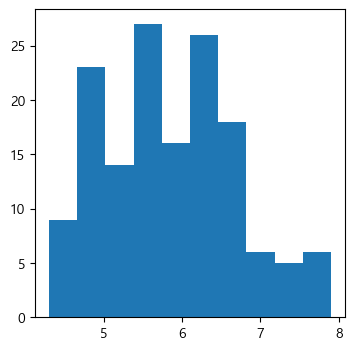

In [11]:
plt.figure(figsize=(4,4))
plt.hist(iris.sepal_length)
plt.show()

#### 히스토그램 객체 반환값
- 계급구간별 관측치 개수, 계급구간(bin)범위, patch 객체 반환

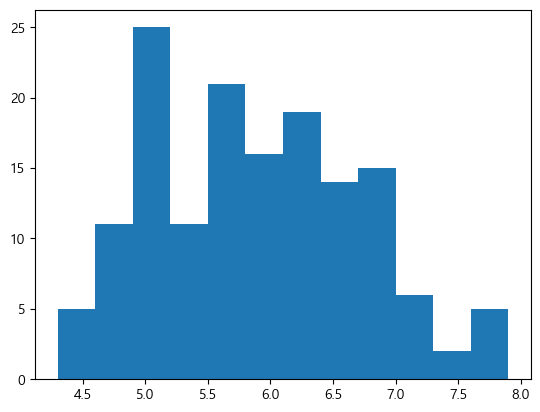

In [13]:
n, bins, patches = plt.hist(iris.sepal_length, bins=12)

In [14]:
print(n, bins, patches)

[ 5. 11. 25. 11. 21. 16. 19. 14. 15.  6.  2.  5.] [4.3 4.6 4.9 5.2 5.5 5.8 6.1 6.4 6.7 7.  7.3 7.6 7.9] <BarContainer object of 12 artists>


(array([24., 26.,  0.,  0.,  3.,  8., 18., 25., 18., 17.,  7.,  4.]),
 array([1.        , 1.49166667, 1.98333333, 2.475     , 2.96666667,
        3.45833333, 3.95      , 4.44166667, 4.93333333, 5.425     ,
        5.91666667, 6.40833333, 6.9       ]),
 <BarContainer object of 12 artists>)

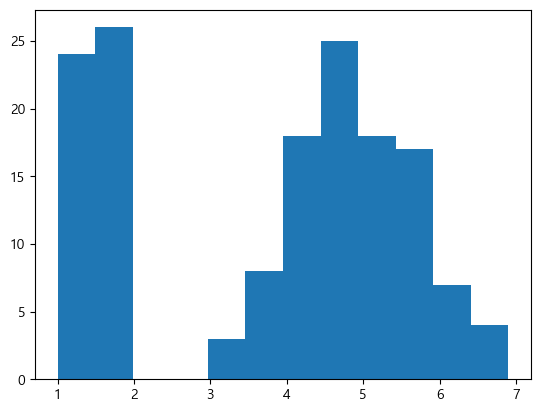

In [15]:
plt.hist(iris.petal_length, bins=12)

#### hist()의 density 인수
- density =  True : y축을 빈도수(frequency)가 아니라 상대빈도(비율)로 지정

(array([0.16666667, 0.42592593, 0.25925926, 0.5       , 0.2962963 ,
        0.48148148, 0.33333333, 0.11111111, 0.09259259, 0.11111111]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

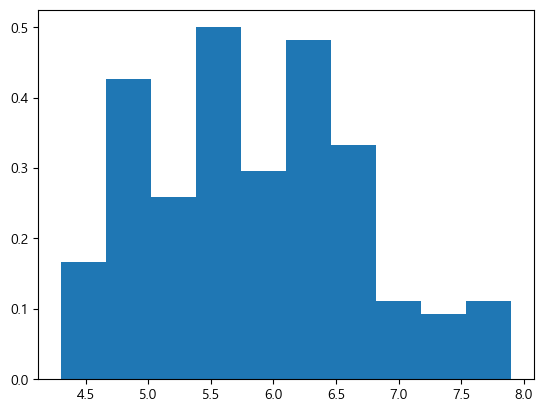

In [16]:
plt.hist(iris.sepal_length, density=True)

#### 히스토그램의 색깔 및 투명도 지정 인수 : facecolor, alpha
- facecolor = 'blue'
- alpha(투명도) : 0~1 사이의 값, 0에 가까워질수록 투명해짐 

(array([0.11111111, 0.19444444, 0.61111111, 0.66666667, 1.02777778,
        0.86111111, 0.27777778, 0.30555556, 0.05555556, 0.05555556]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

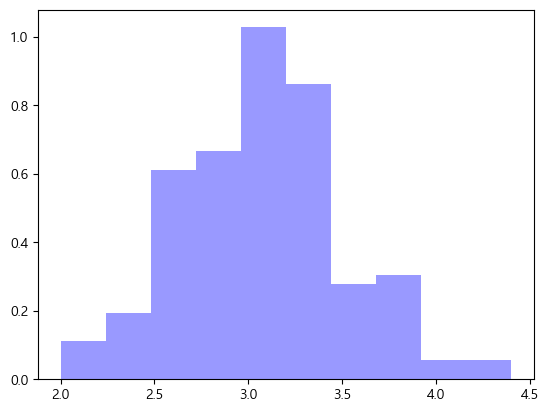

In [18]:
plt.hist(iris.sepal_width, density=True, 
         facecolor='blue', alpha=0.4)

(array([0.11111111, 0.19444444, 0.61111111, 0.66666667, 1.02777778,
        0.86111111, 0.27777778, 0.30555556, 0.05555556, 0.05555556]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

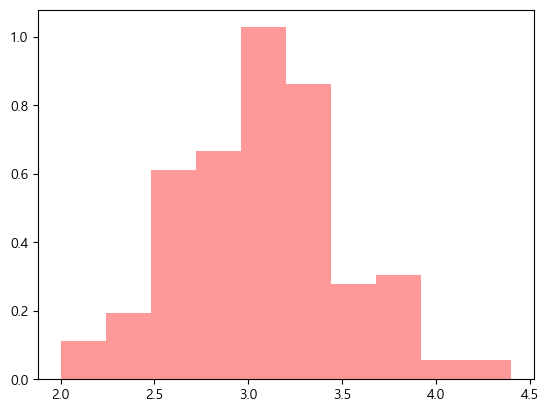

In [19]:
plt.hist(iris.sepal_width, density=True, 
         facecolor='red', alpha=0.4)
plt.show()

#### 플롯의 제목, 축제목, 축범위 등의 지정
- 플롯의 제목, 축제목 표시

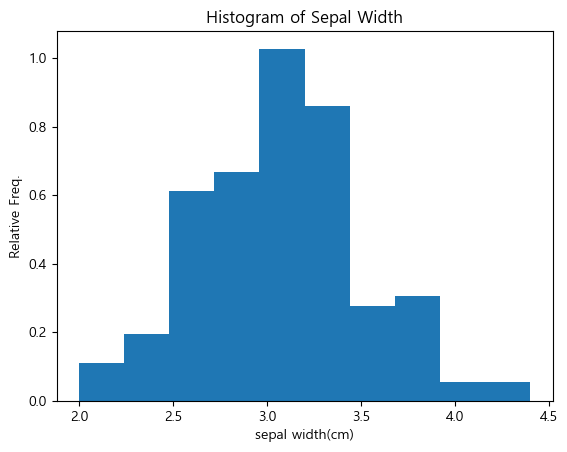

In [20]:
plt.title('Histogram of Sepal Width')
plt.hist(iris.sepal_width, density=True)
plt.xlabel('sepal width(cm)')
plt.ylabel('Density.')
plt.show()

- 플롯의 x축, y축 값 변경, 그리드 표시

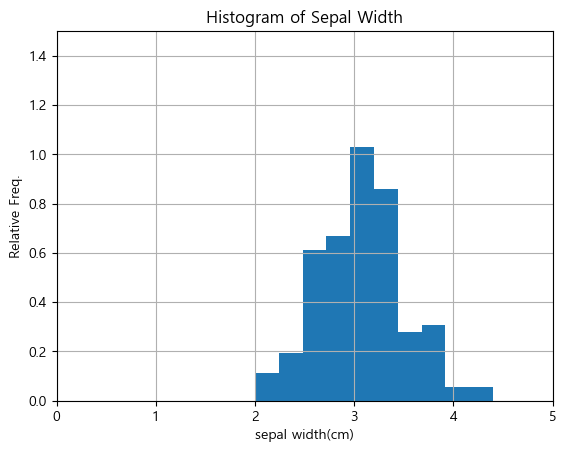

In [24]:
plt.title('Histogram of Sepal Width')
plt.hist(iris.sepal_width, density=True)
plt.xlabel('sepal width(cm)')
plt.ylabel('Density.')
plt.xlim(0,5)
plt.ylim(0,1.5)
plt.grid()
plt.show()

- x축, y축 범위 한꺼번에 지정 : axis([x_하한, x_상한, y_하한, y_상한])  

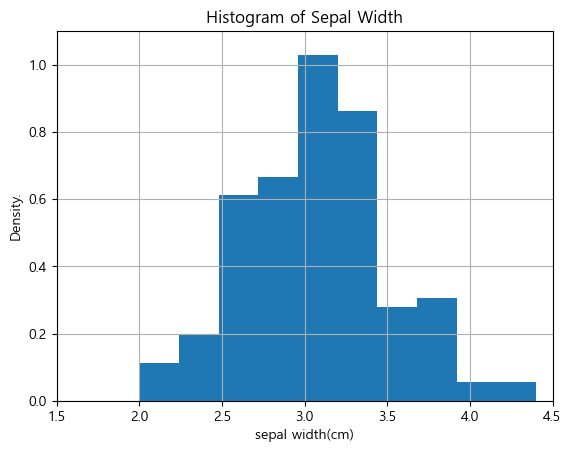

In [42]:
plt.title('Histogram of Sepal Width')
n, bins, patches = plt.hist(iris.sepal_width, density=True)
plt.xlabel('sepal width(cm)')
plt.ylabel('Density.')
plt.axis([1.5, 4.5, 0, 1.1])
plt.grid()

In [41]:
s = n*0.24
s.sum()

0.9999999999999996

In [43]:
bins

array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ])

### ② seaborn의 히스토그램 함수

- 형식1.
    - seaborn.histplot(data, x, y, hue, weights, stat, bins, binwidth, kde, ...)
    - 반환 : ax
    - https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot


- 형식2.
    - displot(kind='hist', x, y, data, hue,...)
    - https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

In [30]:
iris.tail()

sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

### sns.histplot()

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

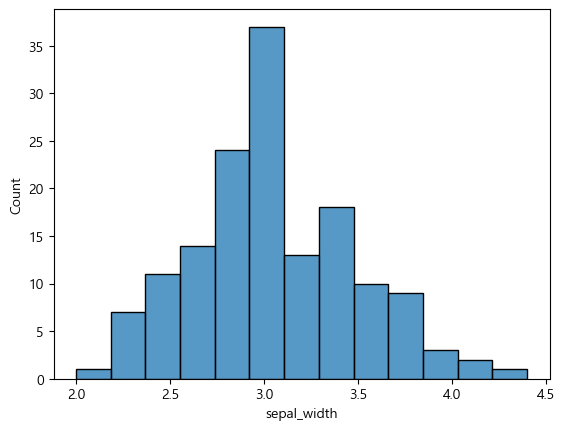

In [31]:
sns.histplot(data=iris, x='sepal_width')

<AxesSubplot:xlabel='Count', ylabel='sepal_length'>

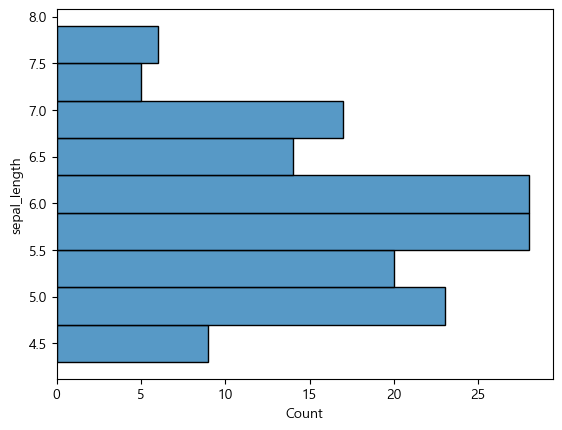

In [33]:
sns.histplot(data=iris, y='sepal_length')

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

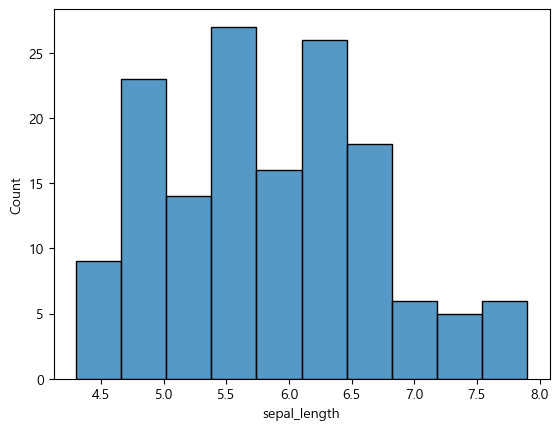

In [34]:
sns.histplot(data=iris, x='sepal_length', bins=10)

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

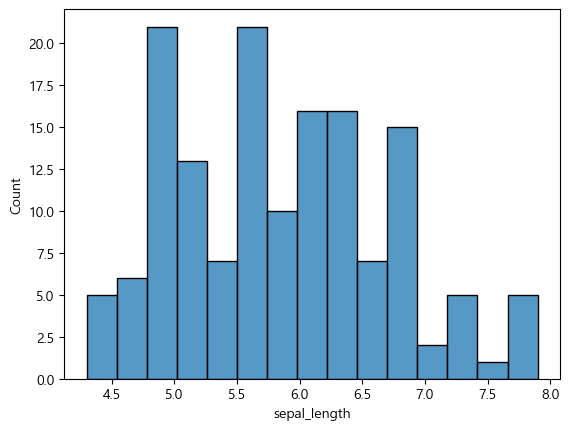

In [36]:
sns.histplot(data=iris, x='sepal_length', bins=15)

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

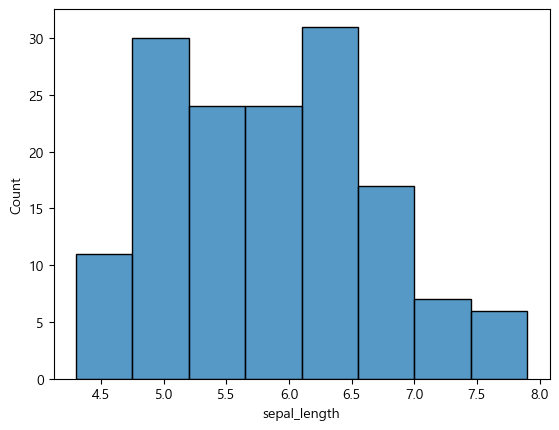

In [37]:
sns.histplot(data=iris, x='sepal_length', bins=8)

#### sns.histplot()의 stat인수

- stat='count' : 각 빈의 관측값수
- stat='frequency' : 각 빈의 너비로 나눈 관측값수
- stat='probability' or 'proportion' : 막대 높이의 합이 1이 되도록 정규화
- stat='percent' : 막대 높이 합이 100이 되도록 정규화
- stat='density' : 히스토그램의 전체 면적이 1이 되도록 정규화

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

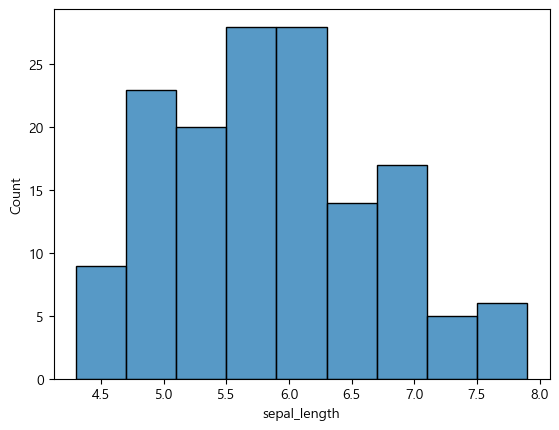

In [45]:
# 디폴트값 : count
sns.histplot(data=iris, x='sepal_length', stat='count')

<AxesSubplot:xlabel='sepal_length', ylabel='Frequency'>

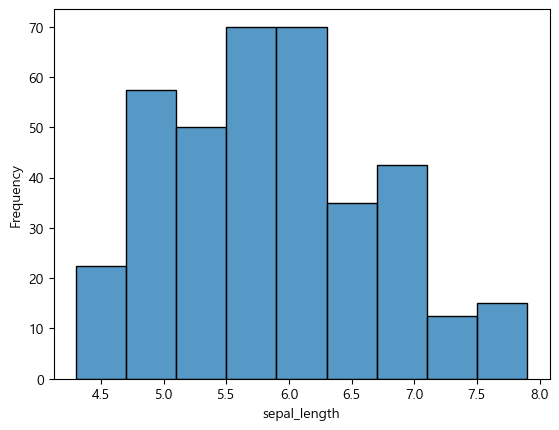

In [44]:
sns.histplot(data=iris, x='sepal_length', stat='frequency')

<AxesSubplot:xlabel='sepal_length', ylabel='Probability'>

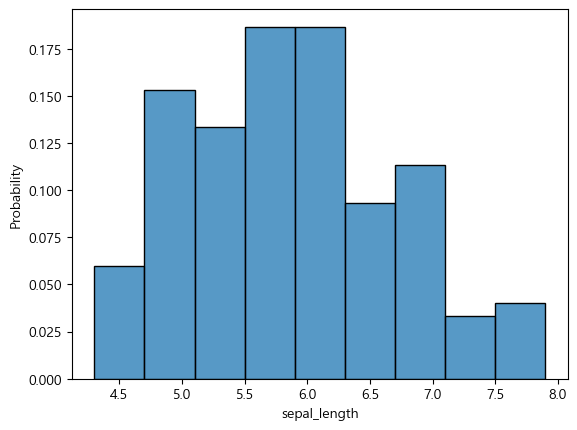

In [48]:
sns.histplot(data=iris, x='sepal_length', stat='probability')

<AxesSubplot:xlabel='sepal_length', ylabel='Percent'>

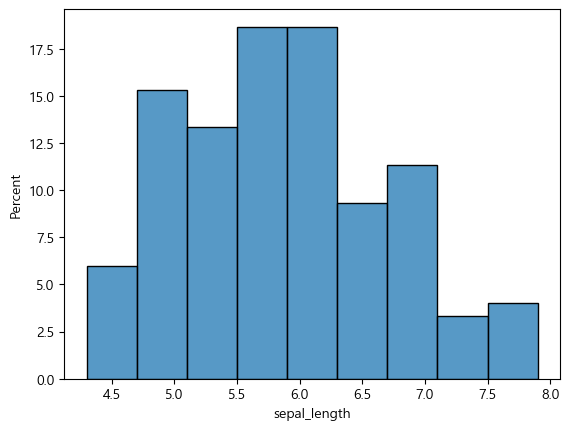

In [46]:
sns.histplot(data=iris, x='sepal_length', stat='percent')

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

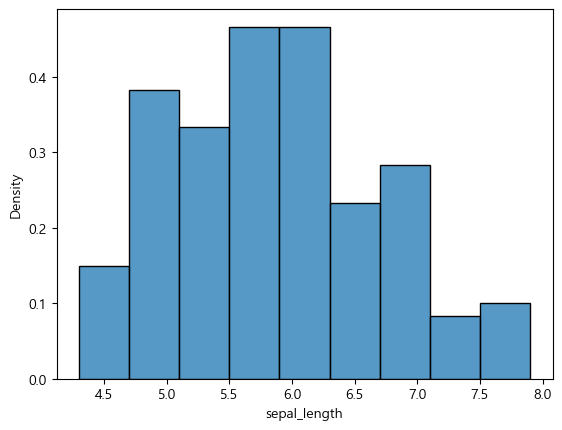

In [47]:
sns.histplot(data=iris, x='sepal_length', stat='density')

#### sns.histplot(kde=True) 사용하여 커널 밀도 함수 곡선 그리기 
- 커널밀도곡선(Kernel Density Estimation curve)을 히스토그램 위에 그림

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

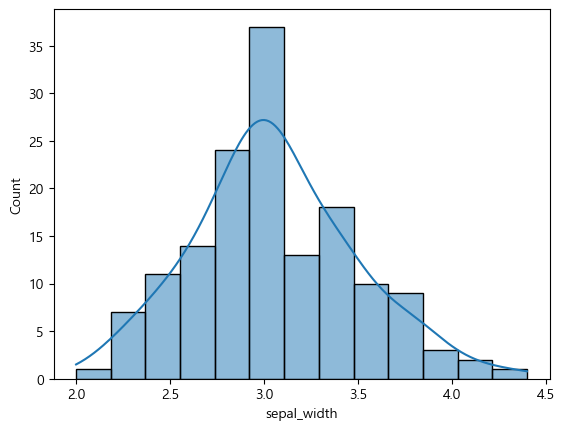

In [49]:
sns.histplot(data=iris, x='sepal_width', kde=True)

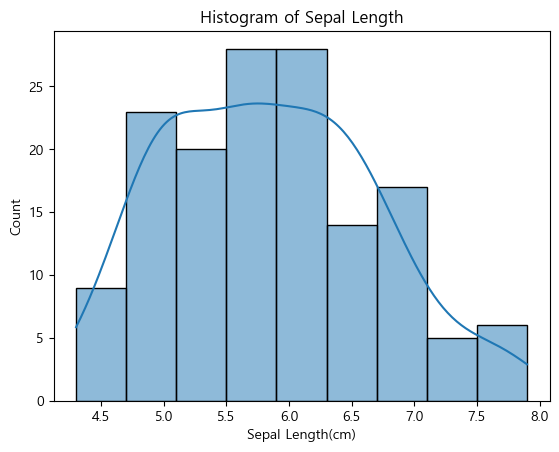

In [51]:
ax = sns.histplot(data=iris, x='sepal_length', kde=True)
ax.set_title('Histogram of Sepal Length')
ax.set_xlabel('Sepal Length(cm)')
plt.show()

#### sns.histplot()의 cumulative인수

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

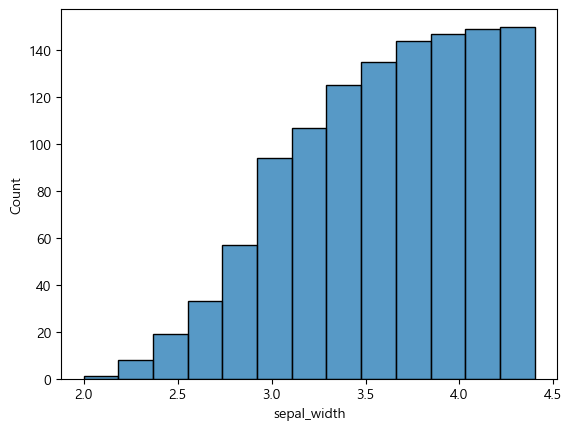

In [52]:
sns.histplot(data=iris, x='sepal_width', cumulative=True)

<AxesSubplot:xlabel='sepal_width', ylabel='Frequency'>

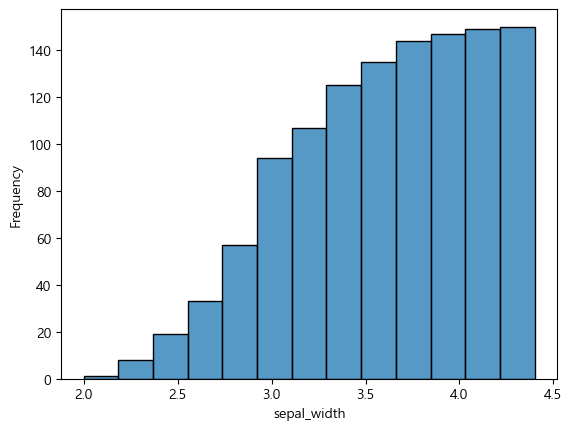

In [53]:
sns.histplot(data=iris, x='sepal_width', stat='frequency', 
             cumulative=True)

<AxesSubplot:xlabel='sepal_width', ylabel='Percent'>

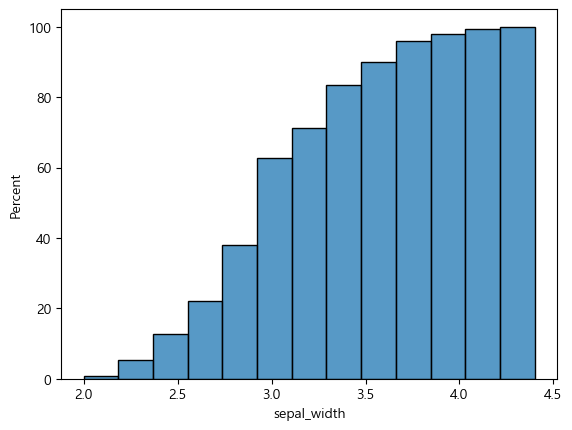

In [54]:
sns.histplot(data=iris, x='sepal_width', stat='percent', 
             cumulative=True)

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

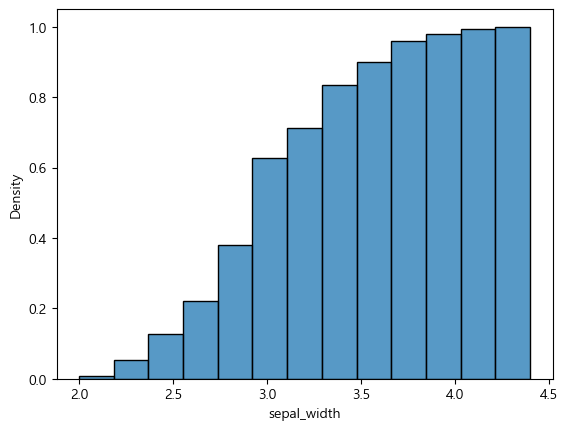

In [55]:
sns.histplot(data=iris, x='sepal_width', stat='density', 
             cumulative=True)

#### sns의 histplot()의 data인수만 지정할 경우
- 수치형 데이터들에 대한 히스토그램을 모두 그림

<AxesSubplot:ylabel='Count'>

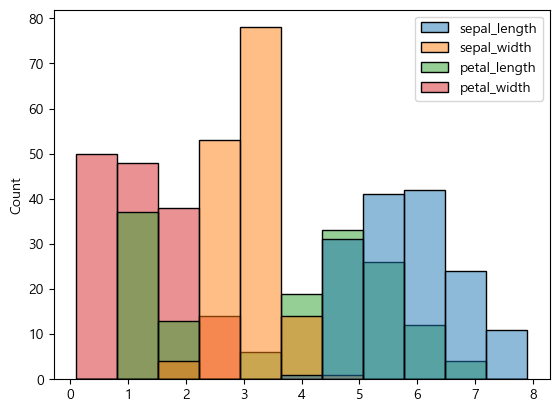

In [56]:
sns.histplot(data=iris)

<AxesSubplot:ylabel='Count'>

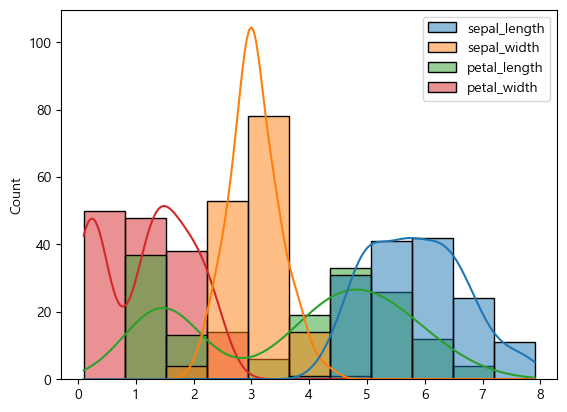

In [57]:
sns.histplot(data=iris, kde=True)

#### sns의 histplot()의 hue인수에 범주형 데이터를 지정할 경우
- 범주형 변수의 그룹별로 히스토그램을 그려 분포 비교 가능

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

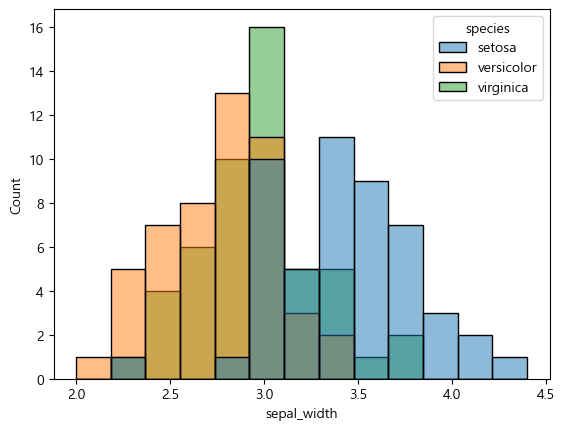

In [58]:
sns.histplot(data=iris, x='sepal_width', hue='species')

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

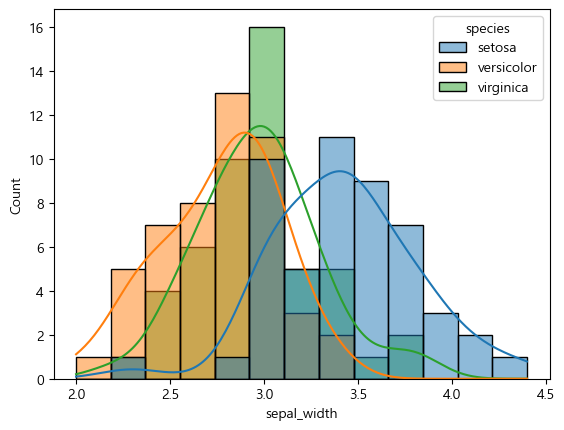

In [59]:
sns.histplot(data=iris, x='sepal_width', hue='species', kde=True)

#### sns의 histplot()의 element 인수 사용

- element = 'step' : 계단모양으로 그림  -> 분포의 윤곽 확인 용이
- element = 'poly' : 다각형으로 그림 -> 계급값끼리 이는 다각형

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

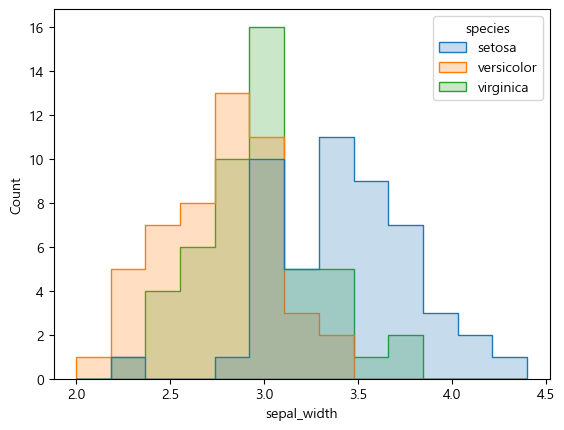

In [60]:
sns.histplot(data=iris, x='sepal_width', hue='species', element='step')

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

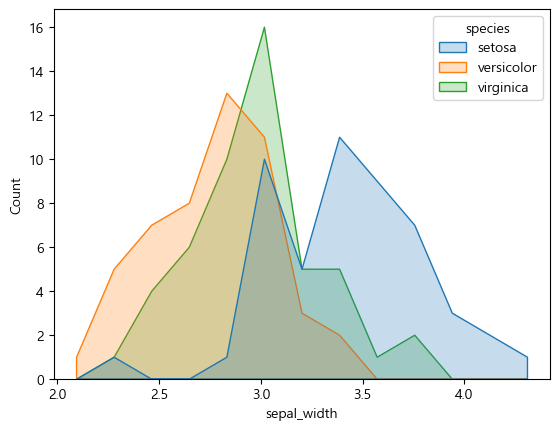

In [61]:
sns.histplot(data=iris, x='sepal_width', hue='species', element='poly')

#### sns.histplot()의 multiple인수

두 변수가 지정된 경우만 사용

- multiple='layer'
- multiple='dodge'
- multiple='stack'
- multiple='fill'

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

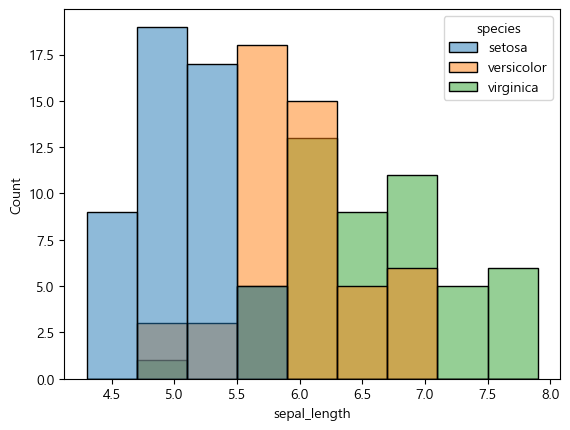

In [64]:
sns.histplot(data=iris, x='sepal_length', hue='species', multiple='layer')

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

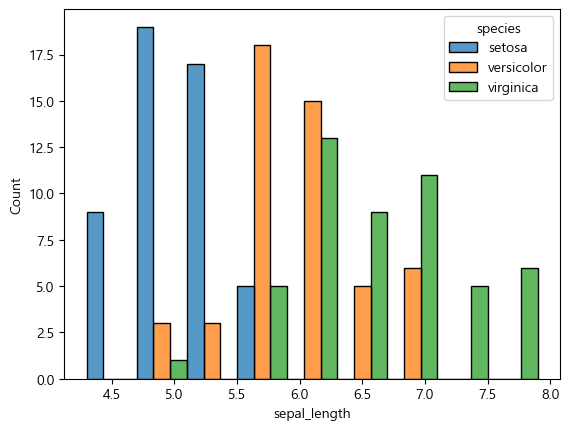

In [63]:
sns.histplot(data=iris, x='sepal_length', hue='species', multiple='dodge')

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

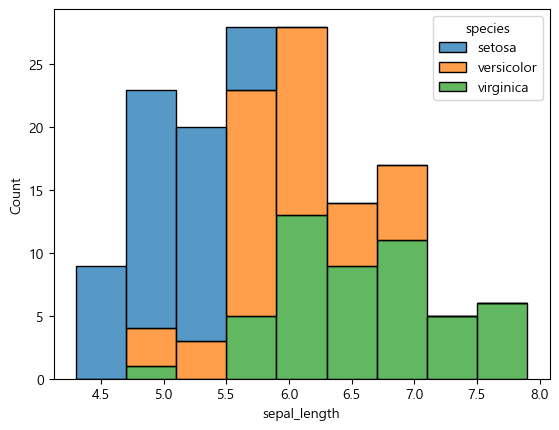

In [65]:
sns.histplot(data=iris, x='sepal_length', hue='species', multiple='stack')

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

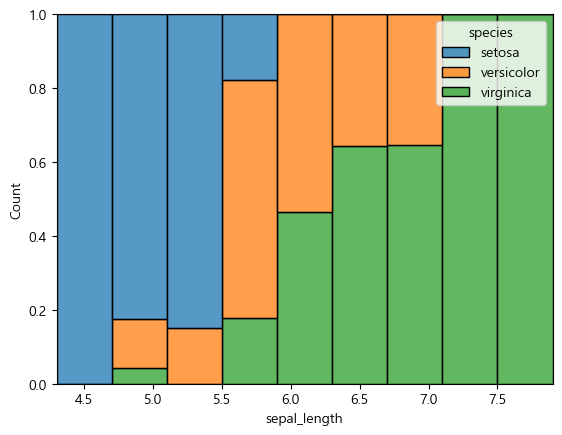

In [66]:
sns.histplot(data=iris, x='sepal_length', hue='species', multiple='fill')

### sns.displot(kind='hist',) 

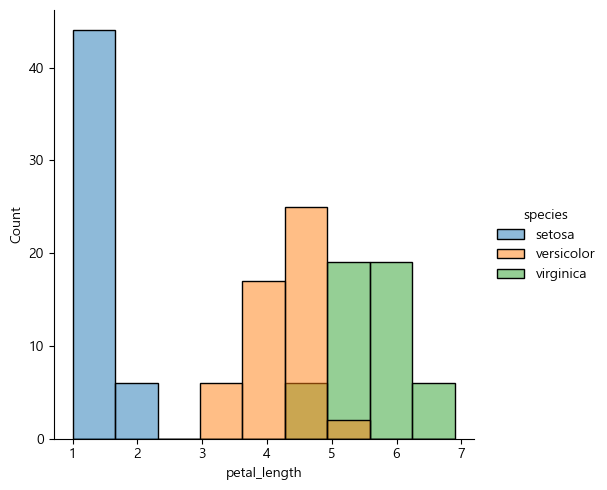

In [67]:
sns.displot(kind='hist', data=iris , x='petal_length', hue='species')

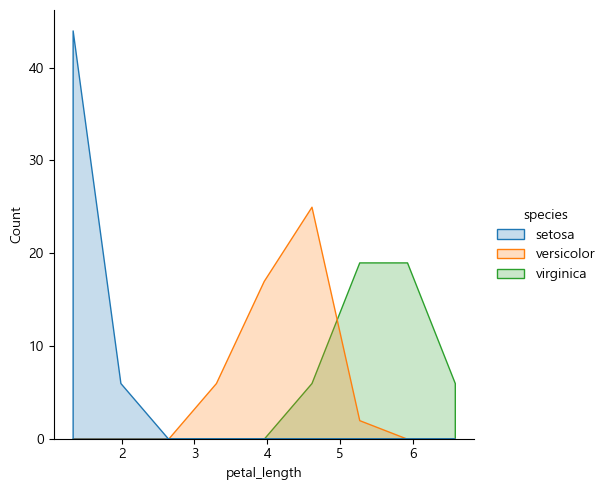

In [68]:
sns.displot(kind='hist', data=iris , x='petal_length', hue='species',
           element='poly')

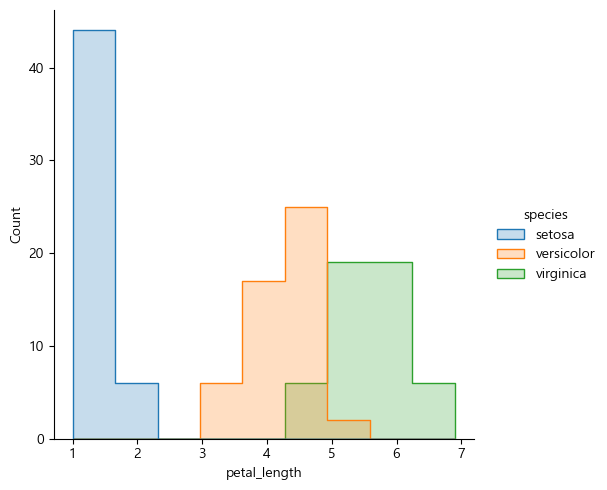

In [69]:
sns.displot(kind='hist', data=iris , x='petal_length', hue='species',
           element='step')

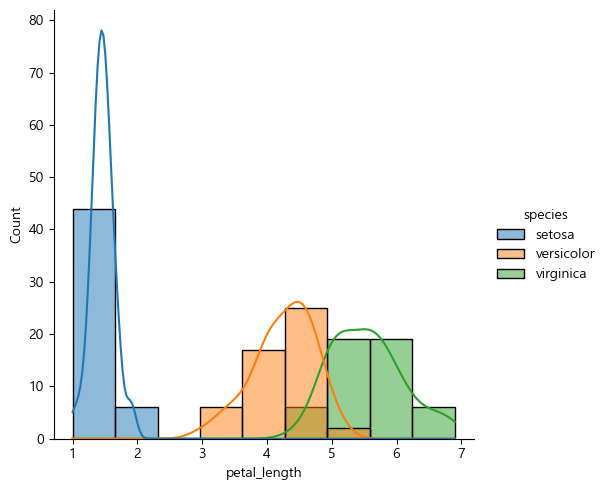

In [72]:
sns.displot(kind='hist', data=iris , x='petal_length', hue='species',
           kde=True)

### ③ pandas.DataFrame.hist()를 이용하여 히스토그램 그리기

<AxesSubplot:>

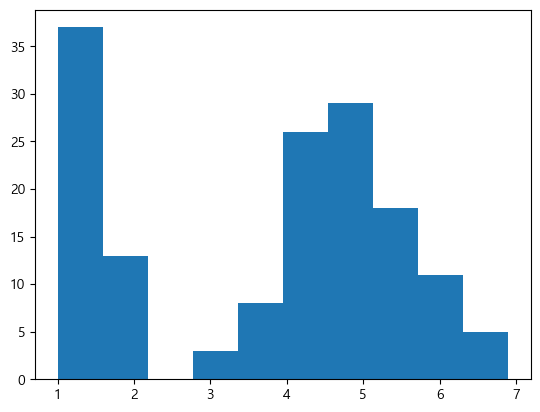

In [75]:
iris['petal_length'].hist(bins=12, grid=False)

### 2) 박스플롯(boxplot)

- '상자 수염 그림'(box-and-whisker plot) 또는 '상자 그림'(box plot, boxplot)이라 부름
- 수치적 자료를 표현하는 그래프
- 자료로부터 얻어낸 통계량인 5가지 요약 수치(five-number summary)를 가지고 그린다
    - 최소값
    - 제1사분위(Q1, lower quartile)
    - 제2사분위(Q2, median)
    - 제3사분위(Q3, upper quartile)
    - 최대값
    
- 이상치 확인
- 분포의 비대칭 확인

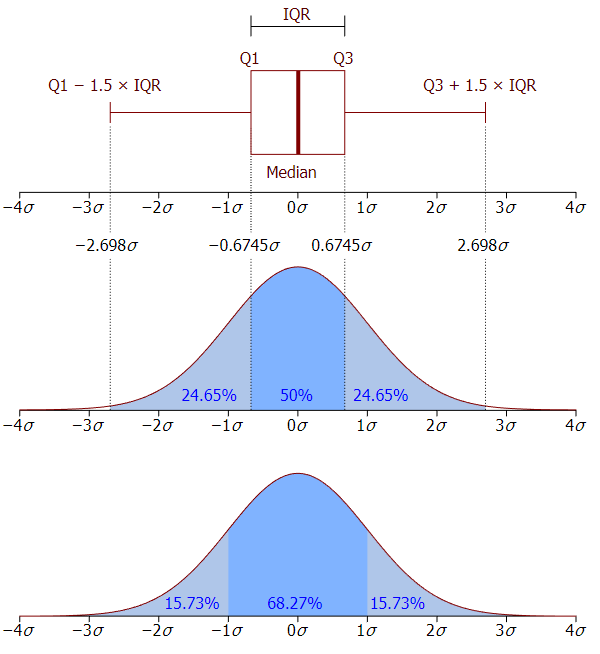

출처: https://rfriend.tistory.com/410?category=675918

### ① matplotlib.pyplot의 박스플롯 함수

- 형식 : boxplot(x, notch, sym, vert, whis, widths, ...)
- 반환값 : dict
    - boxes
    - medians
    - whiskers
    - caps
    - fliers
    - means
    
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

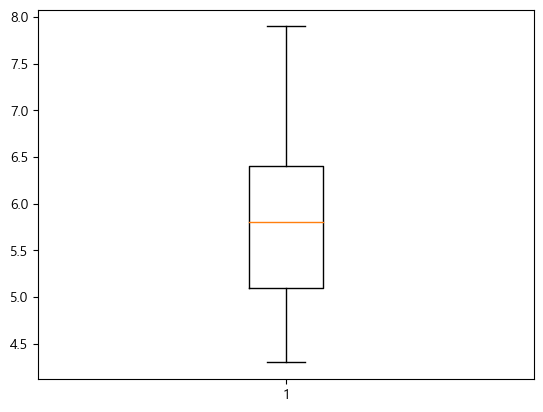

In [78]:
plt.boxplot(iris.sepal_length)
plt.show()

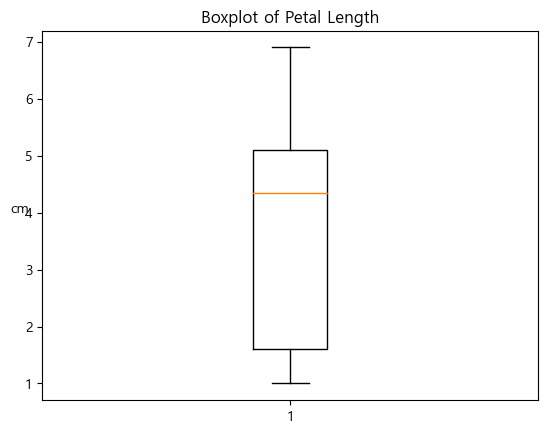

In [80]:
plt.boxplot(iris.petal_length)
plt.title('Boxplot of Petal Length')
plt.ylabel('cm', rotation=0)
plt.show()

#### plt.xticks()을 이용하여 x축의 눈금레이블 변경

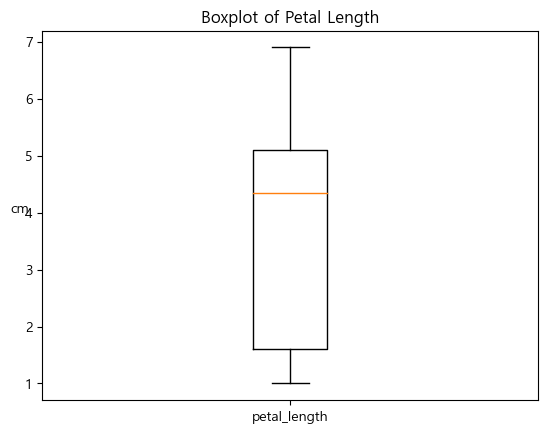

In [82]:
plt.boxplot(iris.petal_length)
plt.title('Boxplot of Petal Length')
plt.ylabel('cm', rotation=0)
plt.xticks([1],['petal_length'])
plt.show()

#### boxplot()의 vert=False를 사용

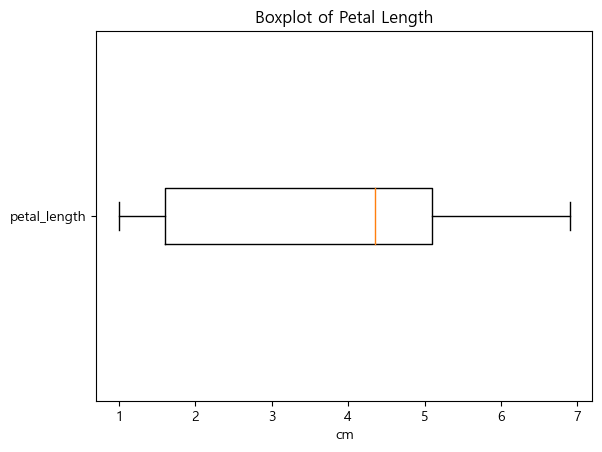

In [83]:
plt.boxplot(iris.petal_length, vert=False)
plt.title('Boxplot of Petal Length')
plt.xlabel('cm')
plt.yticks([1],['petal_length'])
plt.show()

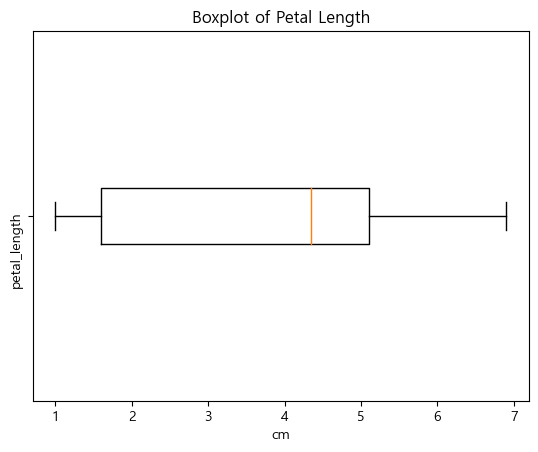

In [84]:
plt.boxplot(iris.petal_length, vert=False)
plt.title('Boxplot of Petal Length')
plt.xlabel('cm')
plt.yticks([1],['petal_length'], rotation=90)
plt.show()

#### plt.boxplot()의 sym인수로 이상치를 다른 스타일로 변경

- 모양 : * 별, s 정사각형, + 십자가, . 작은점, o 큰점, d 다이아몬드 등
- 색상 : r , g, b, 

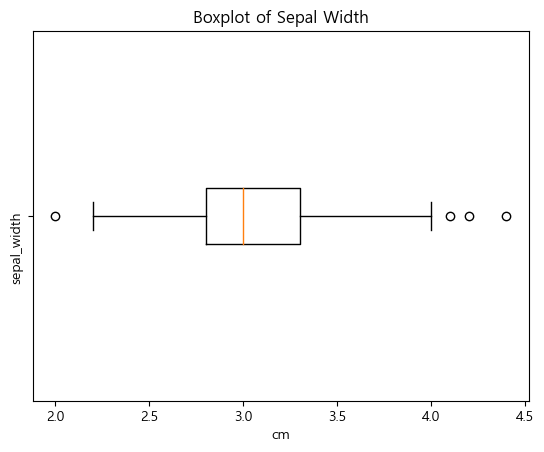

In [86]:
plt.boxplot(iris.sepal_width, vert=False)
plt.title('Boxplot of Sepal Width')
plt.xlabel('cm')
plt.yticks([1],['sepal_width'], rotation=90)
plt.show()

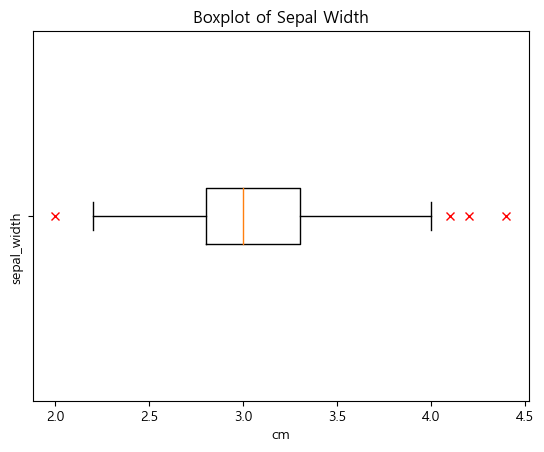

In [87]:
plt.boxplot(iris.sepal_width, vert=False, sym='rx')
plt.title('Boxplot of Sepal Width')
plt.xlabel('cm')
plt.yticks([1],['sepal_width'], rotation=90)
plt.show()

#### [문제] 4개 변수에 대한 박스플롯을 한 플롯에 그리기

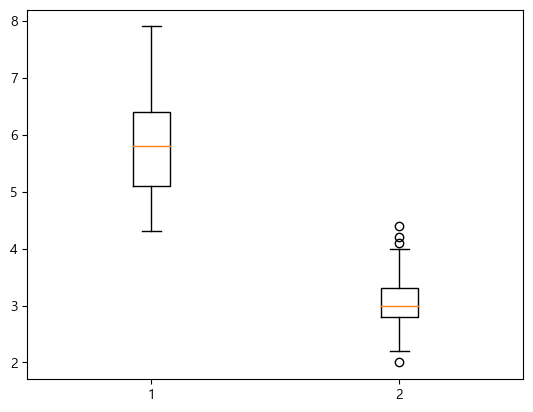

In [91]:
plt.boxplot(iris[['sepal_length', 'sepal_width']])
plt.show()

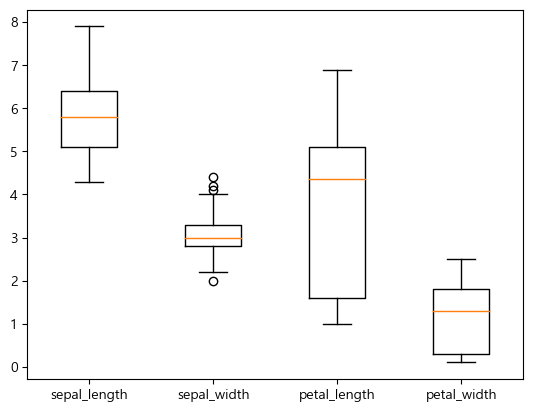

In [95]:
plt.boxplot(iris.iloc[:, :-1])
plt.xticks([1,2,3,4], list(iris.columns[:-1]))
plt.show()

---------------------------------------------

### ② seaborn의 박스플롯 함수

- 형식1.
    - boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ... )

    - 반환값 : ax (matplotlib Axes)
    
    
- 형식2.
    - catplot(kind='box', x=None, y=None, hue=None, data=None, ... )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length'>

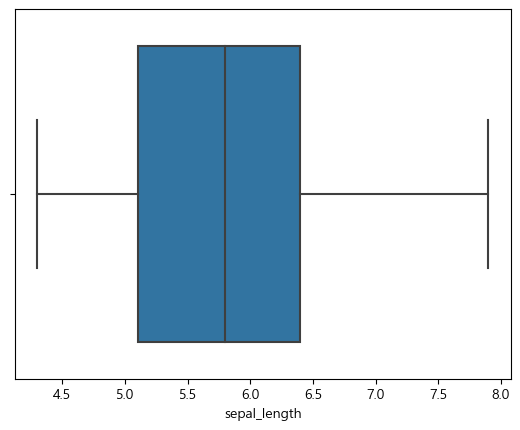

In [99]:
sns.boxplot(iris.sepal_length)

#### sns.boxplot()의 data, x, y 인수
- x : 범주(수치)형 변수
- y : 수치(범주)형 변수
- data : x,y에 지정한 변수를 가진 데이터프레임

<AxesSubplot:xlabel='sepal_length'>

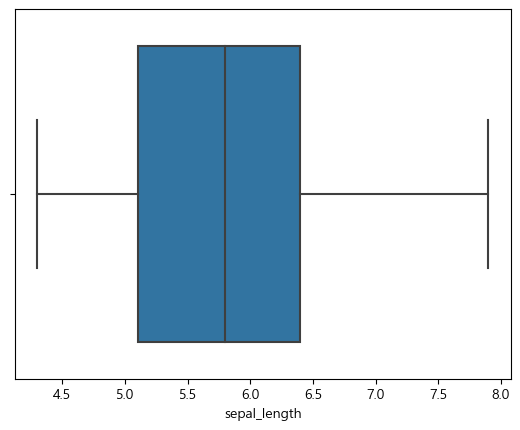

In [100]:
sns.boxplot(data=iris, x='sepal_length')

<AxesSubplot:ylabel='sepal_width'>

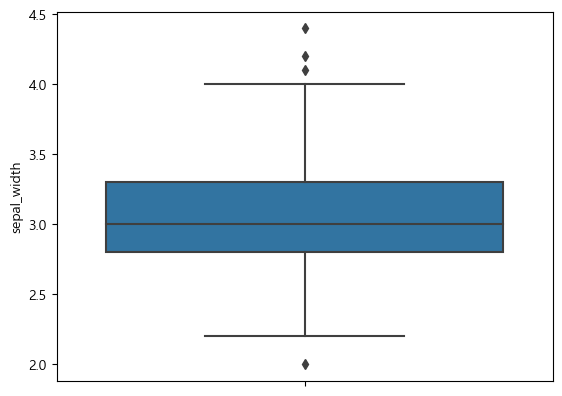

In [102]:
sns.boxplot(data=iris, y='sepal_width')

<AxesSubplot:xlabel='sepal_width', ylabel='species'>

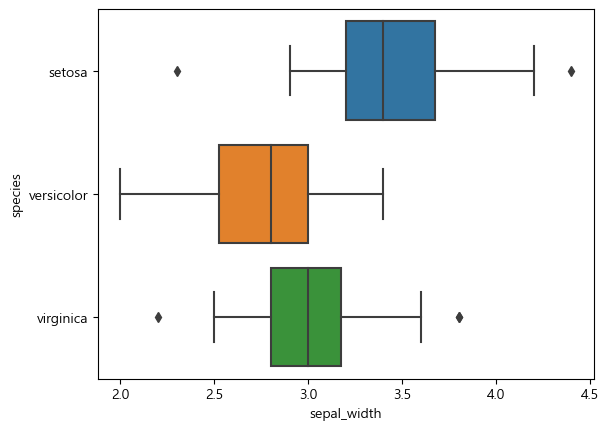

In [103]:
sns.boxplot(data=iris, x='sepal_width', y='species')

#### sns.boxplot()의 order인수로 박스플롯 순서 변경

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

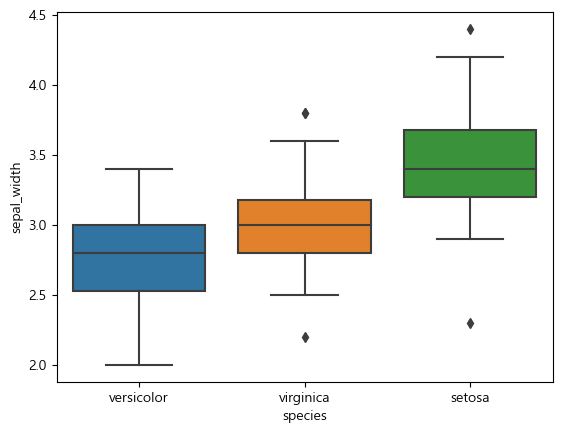

In [105]:
sns.boxplot(data=iris, y='sepal_width', x='species', 
            order=['versicolor','virginica','setosa'])

#### sns.boxplot()의 orient인수로 박스플롯 방향 변경
- orient = 'h' | *'v'

<AxesSubplot:>

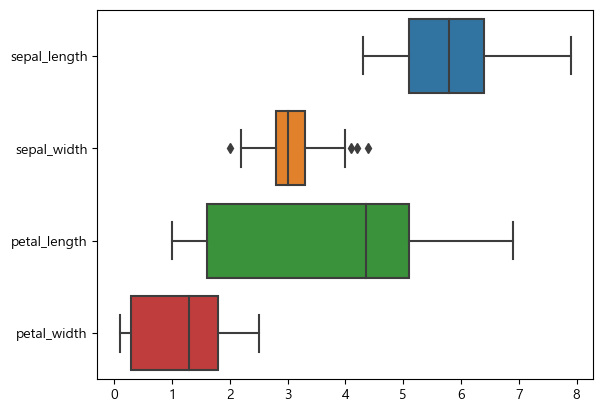

In [111]:
sns.boxplot(data=iris, orient='h')

<AxesSubplot:>

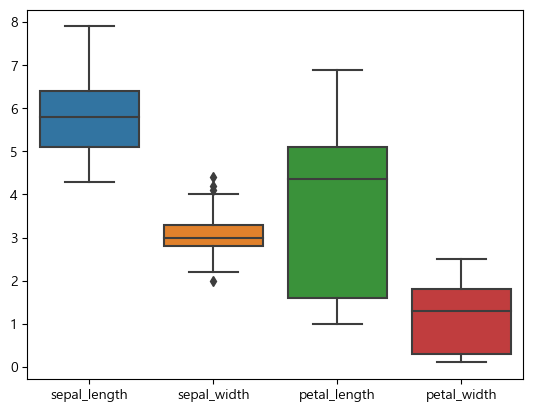

In [108]:
sns.boxplot(data=iris, orient='v')

### ③pandas에서 박스플롯 : pandas.plot.box()

<AxesSubplot:>

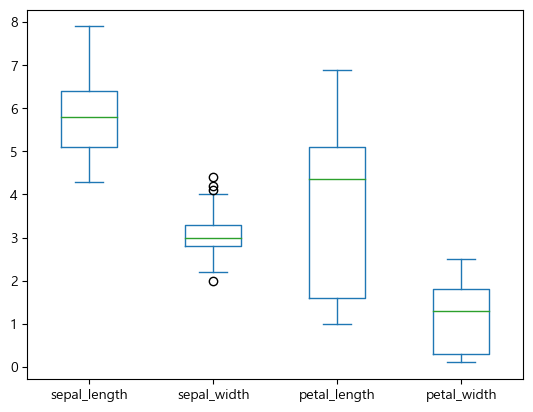

In [109]:
iris.plot.box()

### 3) 이변량 분포(bivariate distribution)

- 이변량 자료 : 두 변수로 이루어진 분포

### seaborn의 histplot()

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

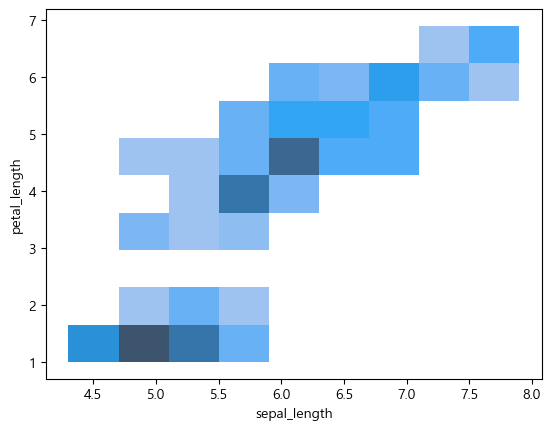

In [112]:
sns.histplot(data=iris, x='sepal_length', y='petal_length')

### seaborn의 displot()

- 형식 : displot(x, y, data, ...)
- https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

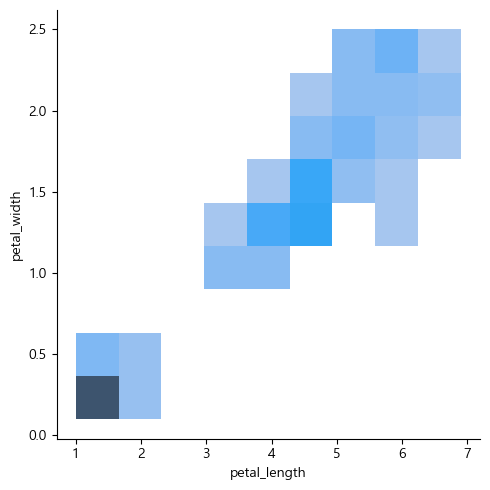

In [113]:
sns.displot(kind='hist', data=iris, x='petal_length', y='petal_width')

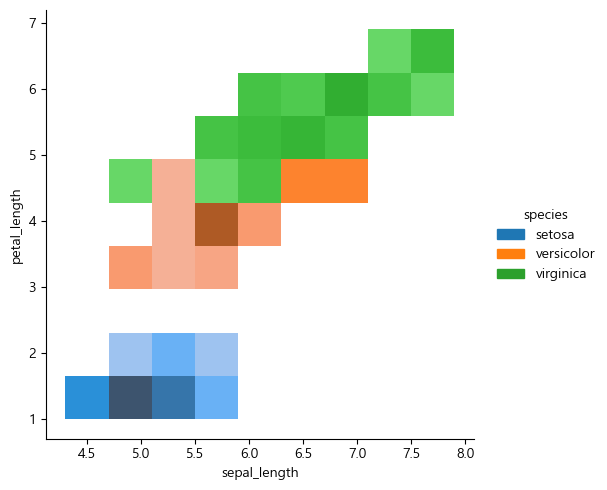

In [114]:
sns.displot(kind='hist', data=iris, x='sepal_length', y='petal_length',
           hue='species')

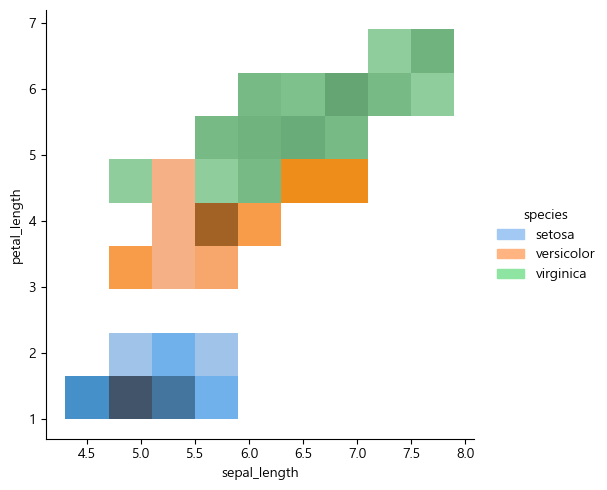

In [115]:
sns.displot(kind='hist', data=iris, x='sepal_length', y='petal_length',
           hue='species', palette='pastel')

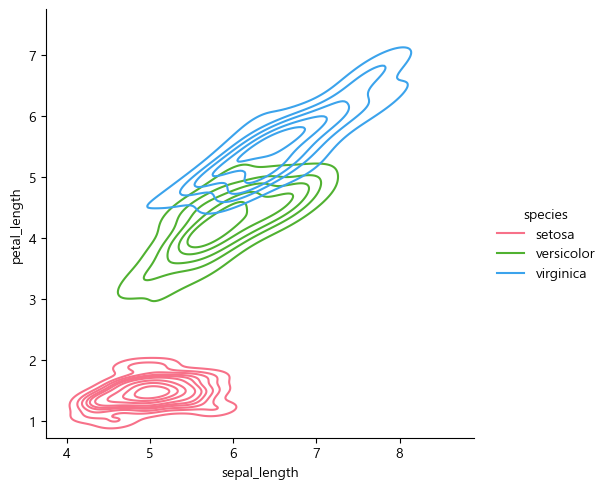

In [117]:
sns.displot(kind='kde', data=iris, x='sepal_length', y='petal_length',
           hue='species', palette='husl')

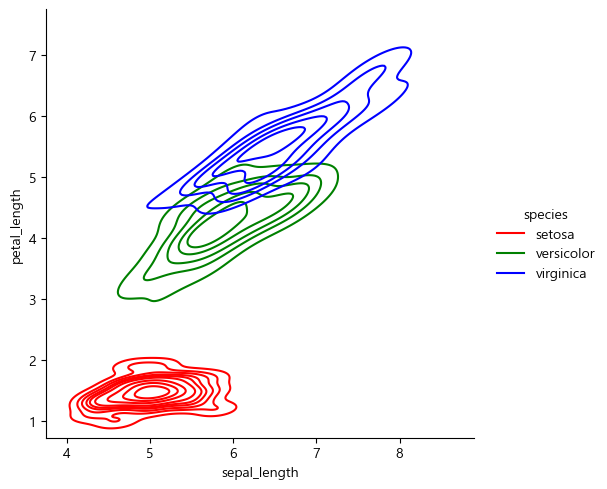

In [118]:
sns.displot(kind='kde', data=iris, x='sepal_length', y='petal_length',
           hue='species', palette=['red','green','blue'])

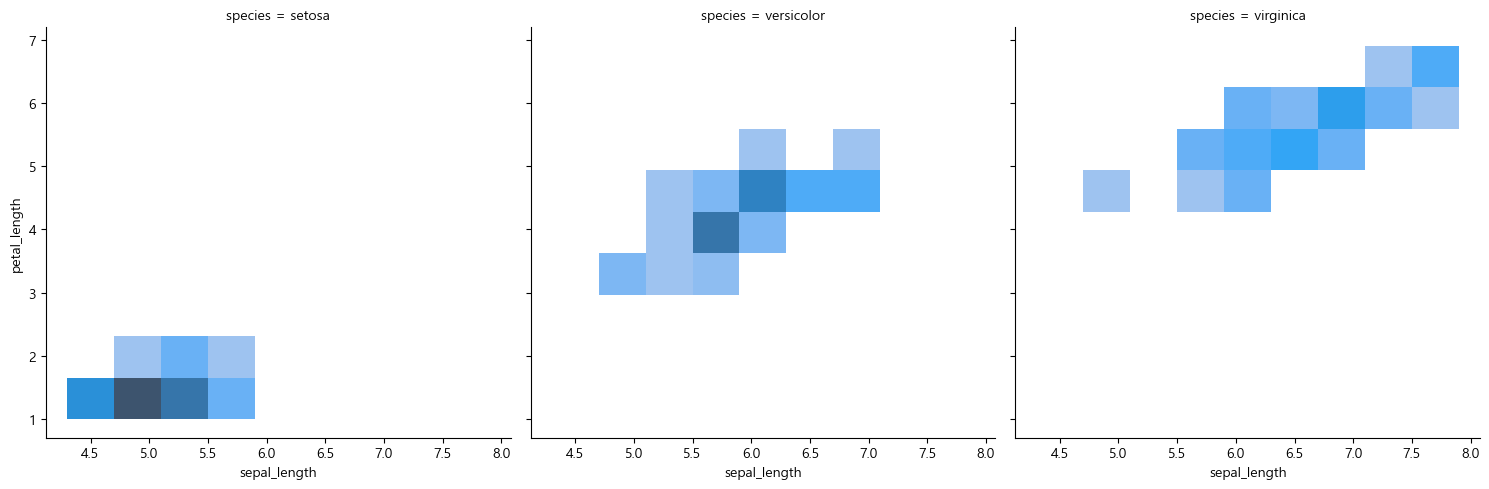

In [120]:
sns.displot(data=iris, x='sepal_length', y='petal_length', col='species')

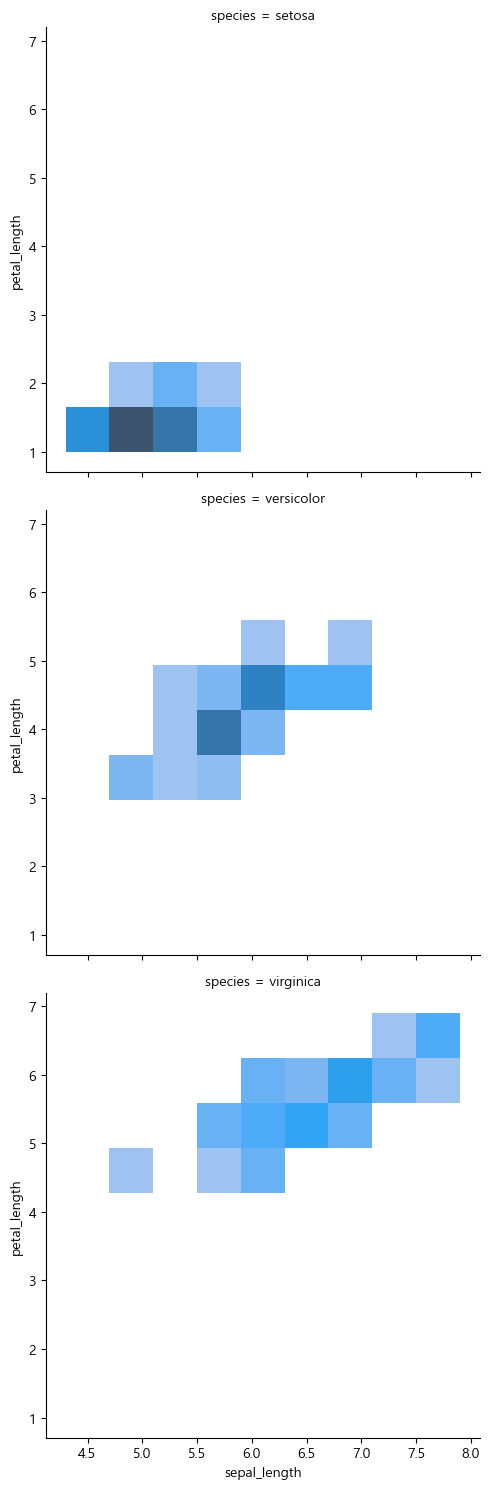

In [121]:
sns.displot(data=iris, x='sepal_length', y='petal_length', row='species')

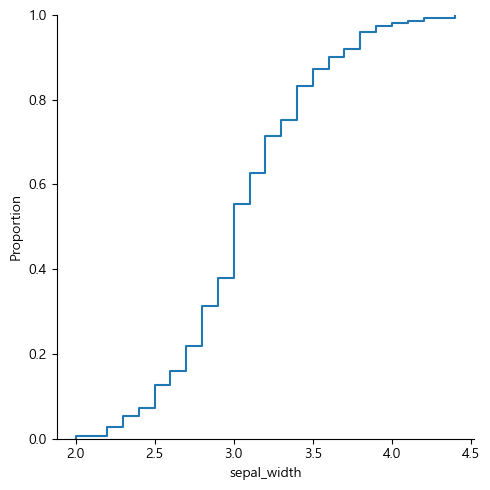

In [123]:
sns.displot(kind='ecdf', data=iris, x='sepal_width')

-------

## 2. 데이터의 관계 파악

- 변수간 상관성(선형성) 파악
- 변수들간의 관계성 파악

- 산점도(scatter plot)
    - matplotlib.pyplot.scatter()
    - matplotlib.pyplot.plot()
    - seaborn.scatterplot()
    - seaborn.relplot(kind='scatter')
    - seaborn.regplot()
    - DataFrame.plot(kind='scatter')
    - DataFrame.plot.scatter()
    

- 버블플롯(bubble plot)
    - matplotlib.pyplot.scatter(, s= ,)
    - seaborn.scatterplot(, size= ,)
    - seaborn.relplot(kind='scatter', size= ,)

    
- 산점도행렬(scatterplot matrix)
    - seaborn.pariplot()
    - pandas.plotting.scatter_matrix()

### 1) 산점도(scatter plot)

- 두 변수간의 선형성 파악
- 두 변수는 수치형 데이터

### ① matplotlib.pyplot의 산점도 함수

- 형식1.
    - scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None,...)
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#


- 형식2.
    - plot(x,y ,linestyle='none', marker='o',)

In [124]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

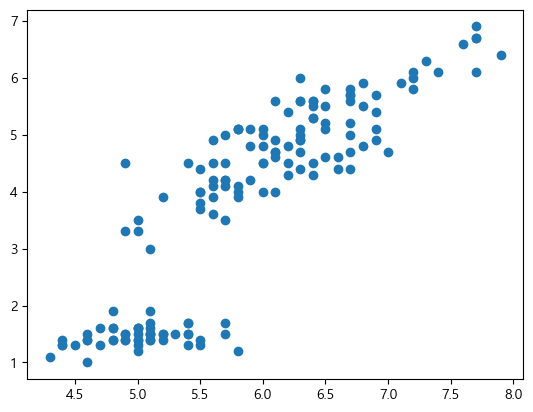

In [125]:
plt.scatter(data=iris, x='sepal_length', y='petal_length')

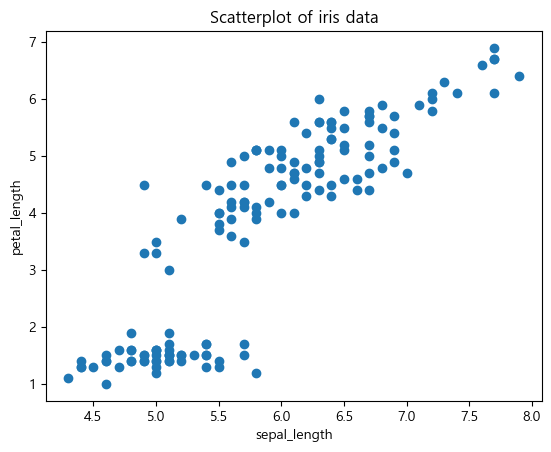

In [126]:
plt.scatter(data=iris, x='sepal_length', y='petal_length')
plt.title('Scatterplot of iris data')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.xlim(3,10)
plt.show()

#### scatter()의 s, c를 이용하여 데이터포인트의 크기,색상 변경

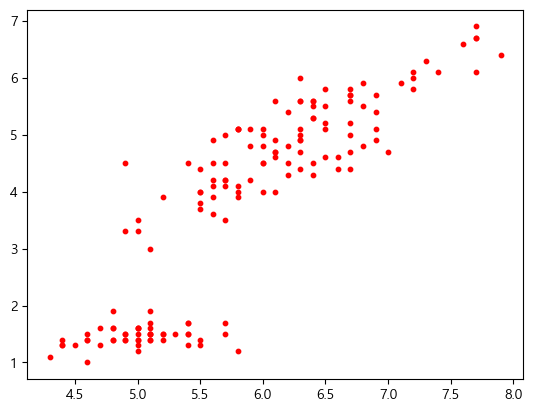

In [127]:
plt.scatter(data=iris, x='sepal_length', y='petal_length',
           s=10, c='red')

#### 범주형 변수의 범주별 데이터를 다른 색상으로 표현한 산점도

In [128]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [132]:
iris.groupby('species').indices['versicolor']

array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [133]:
color = [0]*iris.shape[0]

for idx in iris.groupby('species').indices['setosa']:
    color[idx] = 'red'
for idx in iris.groupby('species').indices['versicolor']:
    color[idx] = 'green'
for idx in iris.groupby('species').indices['virginica']:
    color[idx] = 'blue'

In [134]:
color

['red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 

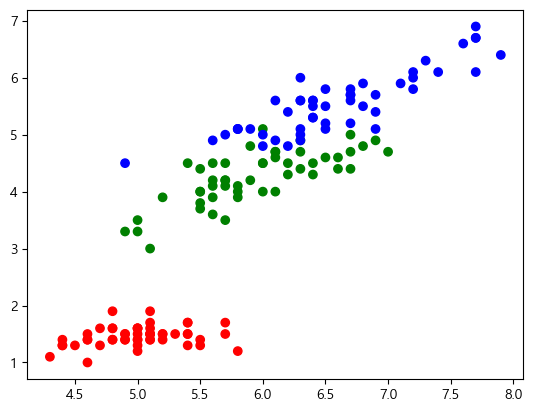

In [135]:
plt.scatter(data=iris, x='sepal_length', y='petal_length', c=color)

### maptlotlib의 plot()함수 인수 지정하여 산점도 그리기

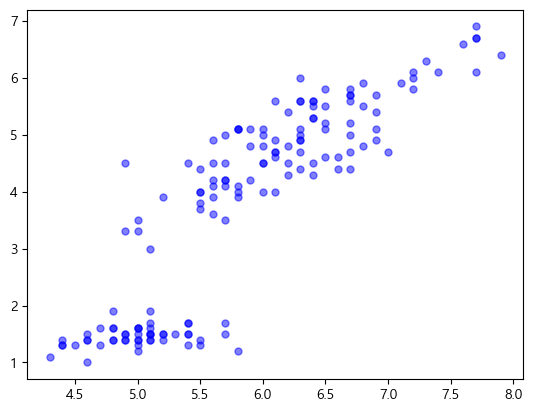

In [144]:
plt.plot( 'sepal_length', 'petal_length', data=iris,
        linestyle='None', marker='o', ms=5,
        color='blue', alpha=0.5)

#### plt.plot()의 marker, markersize, color등을 사용하여 산점도의 스타일 변경

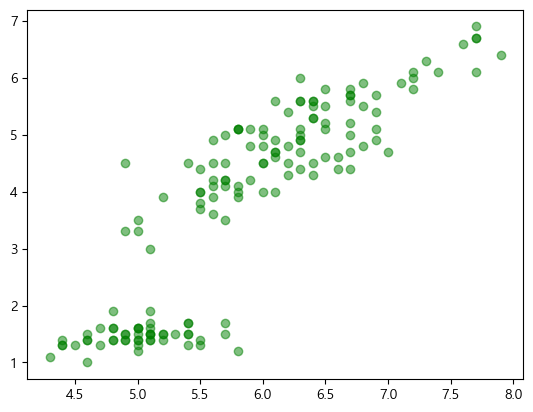

In [145]:
plt.plot( 'sepal_length', 'petal_length', data=iris,
        linestyle='none', marker='o', ms=6,
        color='green', alpha=0.5)

Text(0.5, 1.0, 'Scatter of Iris')

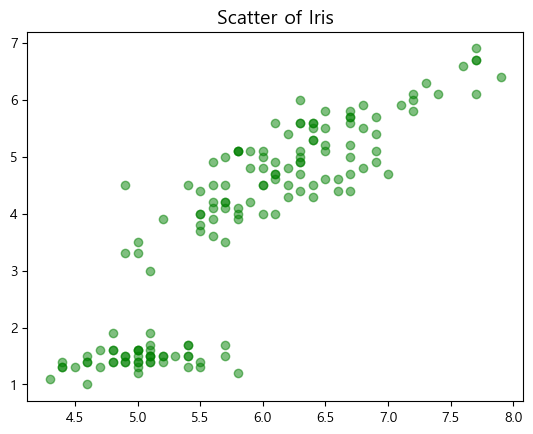

In [146]:
plt.plot( 'sepal_length', 'petal_length', data=iris,
        linestyle='none', marker='o', ms=6,
        color='green', alpha=0.5)
plt.title('Scatter of Iris', fontsize=14)

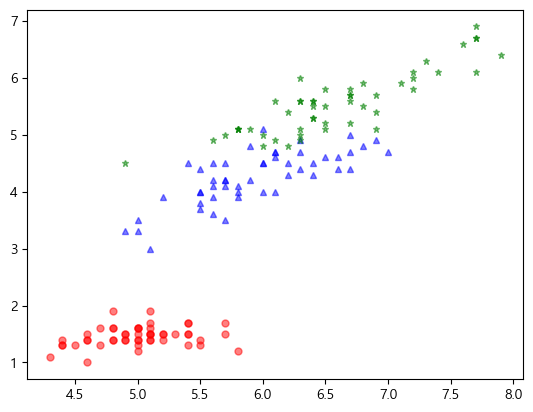

In [150]:
setosa = iris[iris.species == 'setosa']
versicolor = iris[iris.species == 'versicolor']
virginica = iris[iris.species == 'virginica']

plt.plot('sepal_length', 'petal_length', 'ro', data=setosa,
        ls='none', ms=5, alpha=0.5)

plt.plot('sepal_length', 'petal_length', 'b^', data=versicolor,
        ls='none', ms=5, alpha=0.5)

plt.plot('sepal_length', 'petal_length', 'g*', data=virginica,
        ls='none', ms=5, alpha=0.5)

### ② seaborn의 산점도 함수

- 형식1.
    - scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, ... )
    - https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

    
- 형식2.
    - relplot(kind='scatter', x=None, y=None, hue=None, size=None, data=None, ... )
    - https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot
    
    
- 형식3.
    - regplot(x=None, y=None, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95,...)
    - https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot

### sns.scatterplot()

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

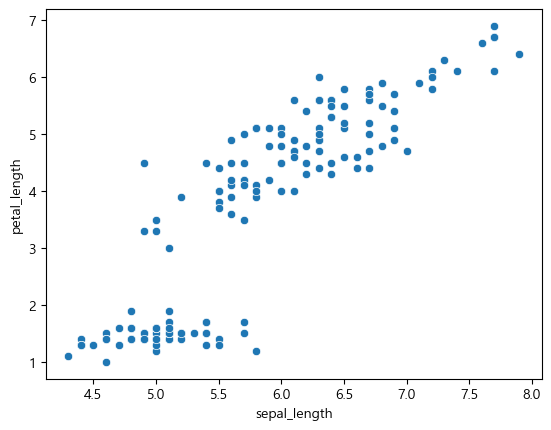

In [151]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length')

#### sns.scatterplot()의 hue 인수
- 범주형 변수의 범주에 따라 다른 색상으로 표시

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

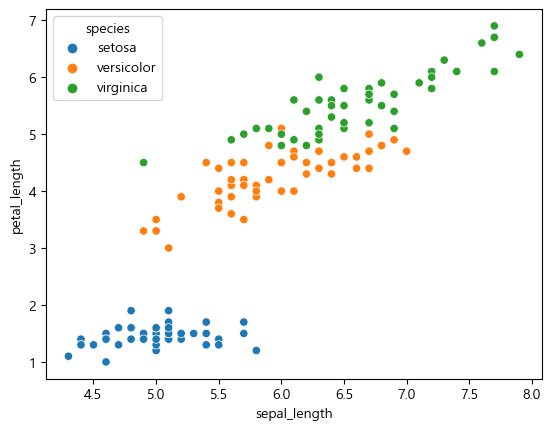

In [153]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species')

#### sns.scatterplot()의 style 인수
- 범주형 변수의 범주에 따라 마커 모양을 다르게 표현

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

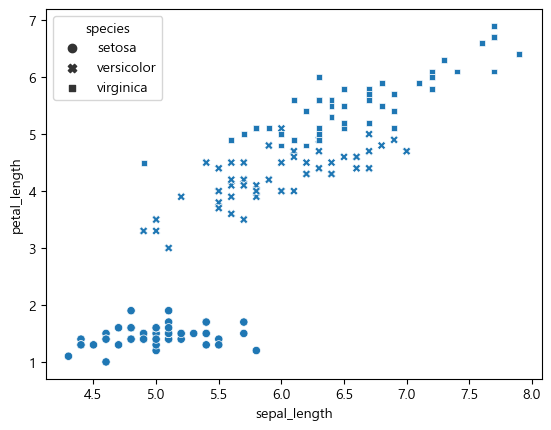

In [154]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', style='species')

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

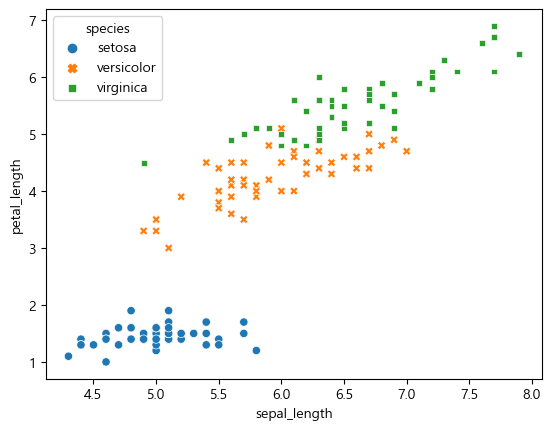

In [155]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', 
                hue='species',style='species')

#### sns.scatterplot()의 s인수로 마커 크기 변경

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

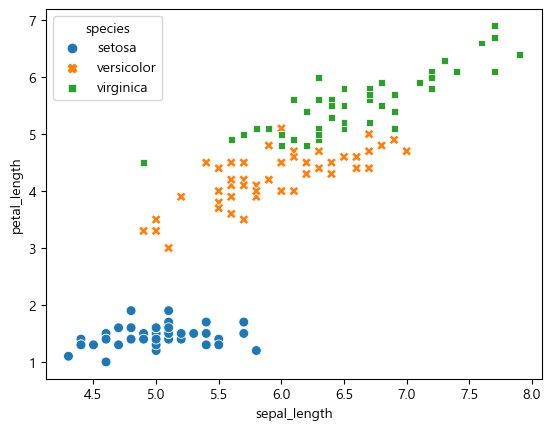

In [157]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', 
                hue='species',style='species', s=50)

#### scatterplot()함수의 alpha 인수를 이용하여 스타일 변경

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

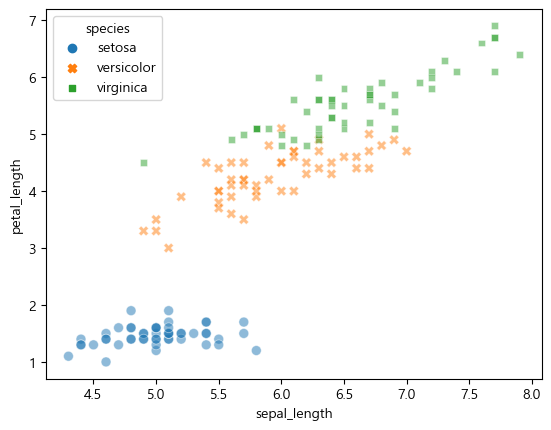

In [158]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', 
                hue='species',style='species', s=50, alpha=0.5)

### sns.relplot(kind='scatter')

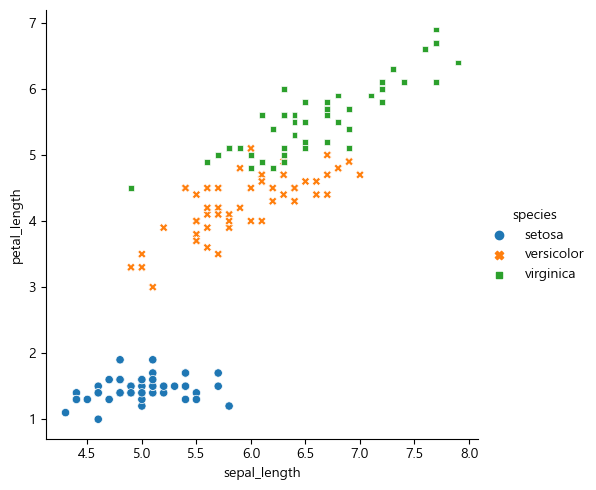

In [160]:
sns.relplot(kind='scatter', data=iris, x='sepal_length', y='petal_length', 
                hue='species',style='species')

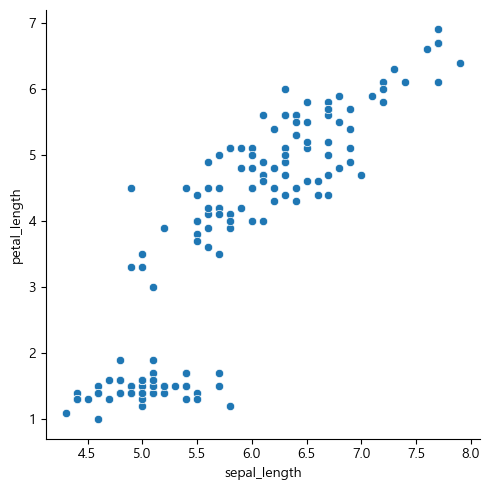

In [161]:
sns.relplot(kind='scatter', data=iris, x='sepal_length', y='petal_length')

#### sns.scatterplot()의 palette 인수

- seaborn에서 제공되는 팔레트 : https://seaborn.pydata.org/tutorial/color_palettes.html

In [163]:
sns.color_palette()

In [166]:
sns.color_palette('dark')

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

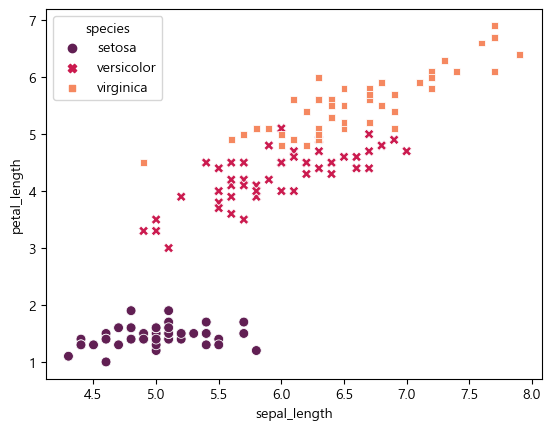

In [170]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', 
                hue='species',style='species', s=50, palette='rocket')

- relplot()의 col인수

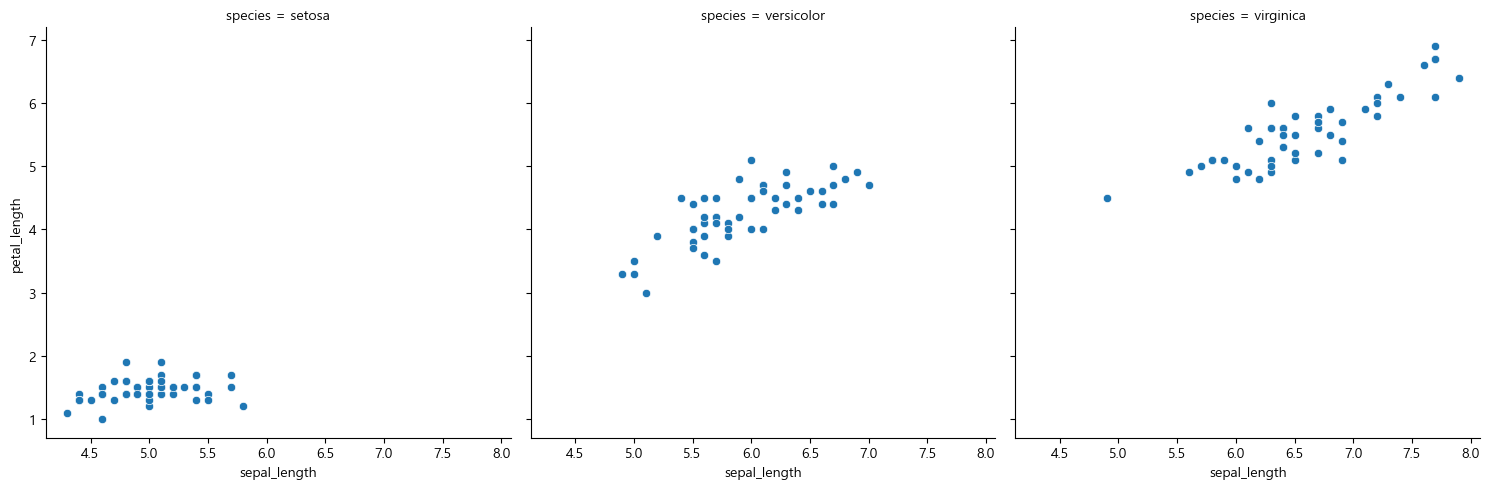

In [172]:
sns.relplot(kind='scatter', data=iris, x='sepal_length', y='petal_length', 
                col='species',palette='rocket')

### regplot()함수를 이용하여 산점도 그리기
- 선형회귀 적합 선을 포함시키지 않으려면 fit_reg=False

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

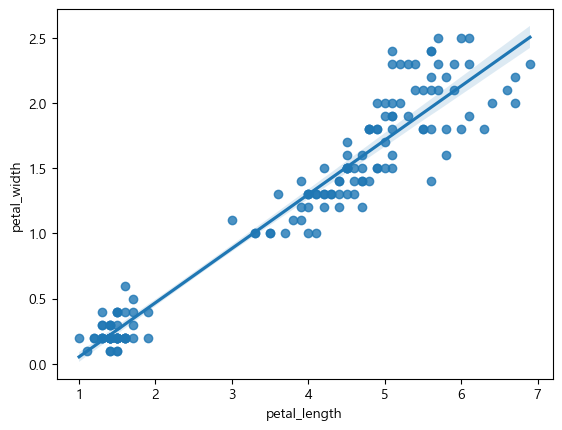

In [173]:
sns.regplot(data=iris, x='petal_length', y='petal_width')

- regplot()의 fit_reg=True

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

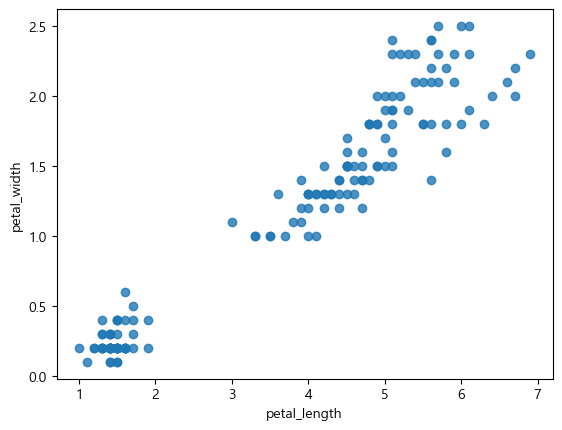

In [175]:
sns.regplot(data=iris, x='petal_length', y='petal_width', fit_reg=False)

### ③ pandas의 plot.scatter()함수를 이용하여 산점도 그리기

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

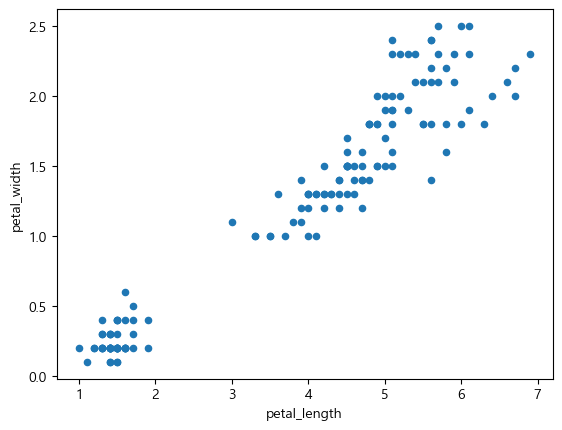

In [176]:
iris.plot.scatter(x='petal_length', y='petal_width')

### 2) 산점도 행렬(scatter plot matrix) 그리기

- 여러 개의 연속형 변수에 대해서 두 변수씩 쌍을 이루는 산점도를 그려 한꺼번에 변수 간 관계를 일목요연하게 볼 수 있음

###  ① seaborn.pairplot()을 이용한 산점도 행렬

- 형식 : pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)


- https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

#### pairplot()의 인수를 이용한 산점도 행렬1
- diag_kind='hist'를 설정하여 대각원소 자리에 각 변수별 히스토그램 그리기

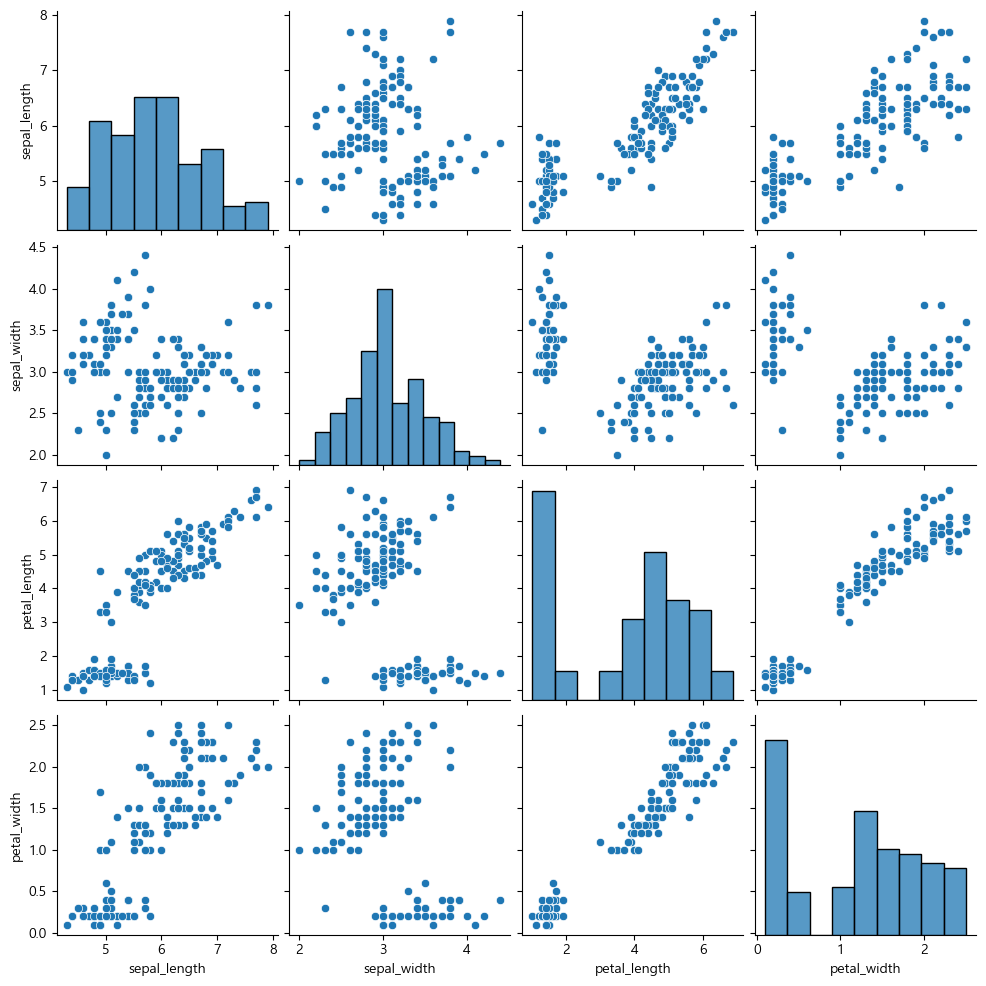

In [178]:
# 디폴트 :  diag_kind='hist'
sns.pairplot(data=iris, diag_kind='hist')

#### pairplot()의 인수를 이용한 산점도 행렬2
- diag_kind='kde' : 각 변수별 커널밀도추정곡선 그림
- hue='species' : 'species'(setosa, versicolor, virginica) 별로 색깔을 다르게 표시
- 색깔은 palette 에 'bright', 'pastel', 'deep', 'muted', 'colorblind', 'dark' 중에서 가독성이 좋고 선호하는 색상으로 선택 

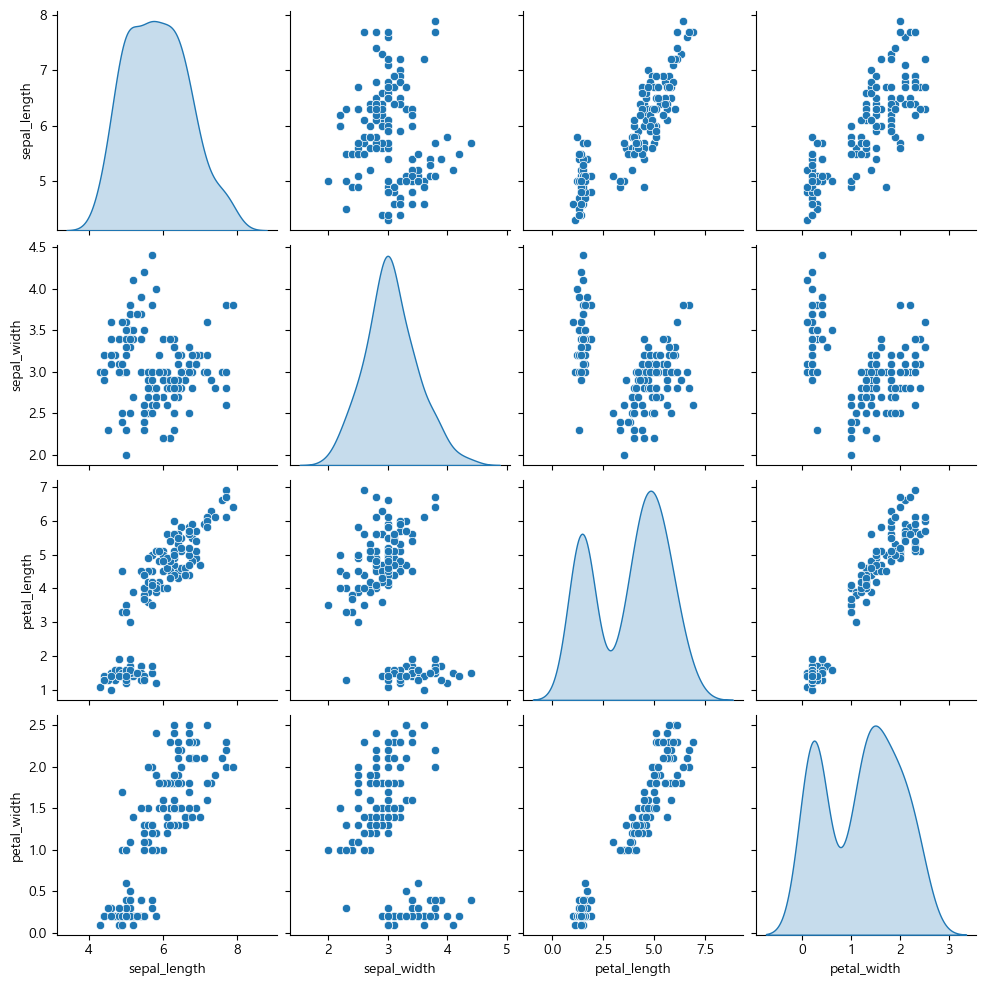

In [179]:
sns.pairplot(data=iris, diag_kind='kde')

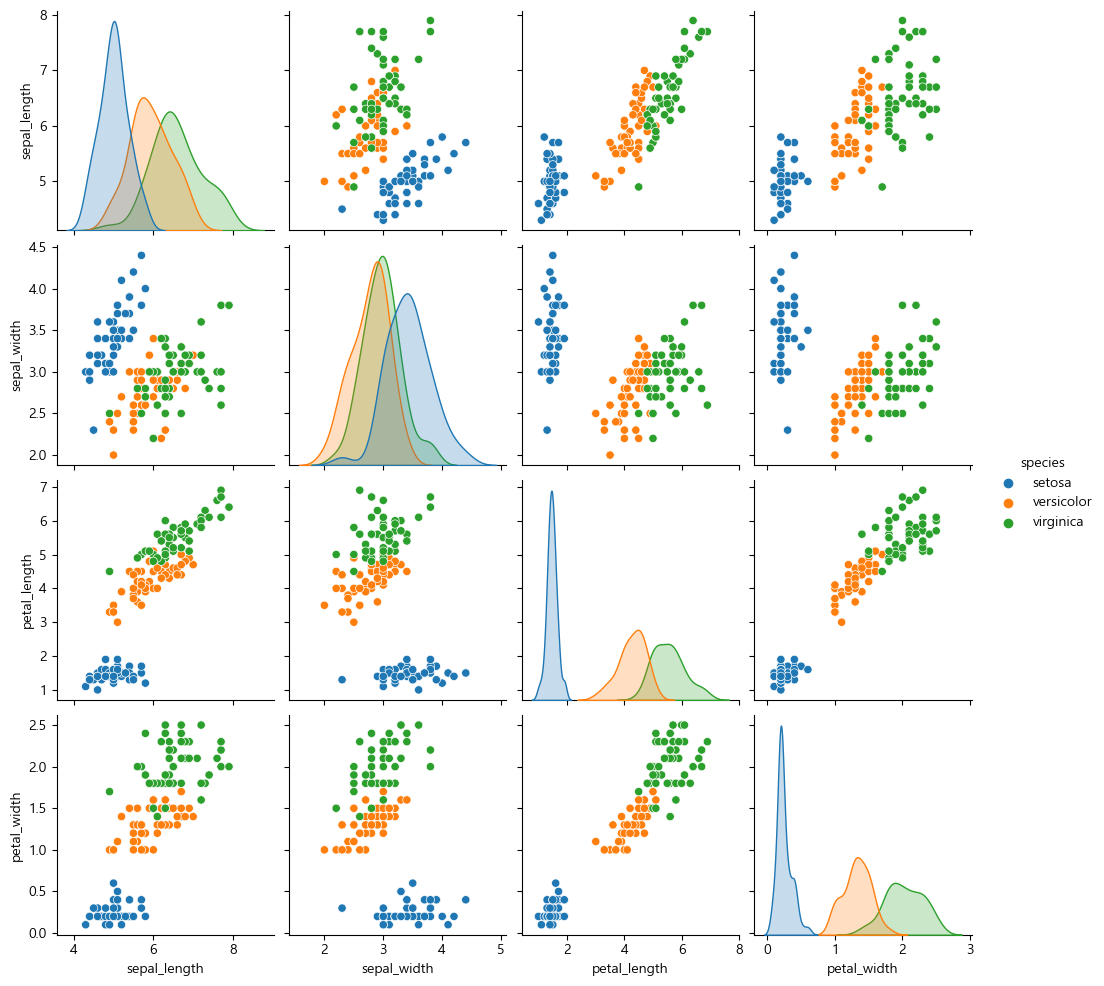

In [180]:
sns.pairplot(data=iris, diag_kind='kde', hue='species')

### ② pandas.plotting 의 scatter_matrix() 함수를 사용하여 산점도 행렬

- 형식 : scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwargs)


- https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html

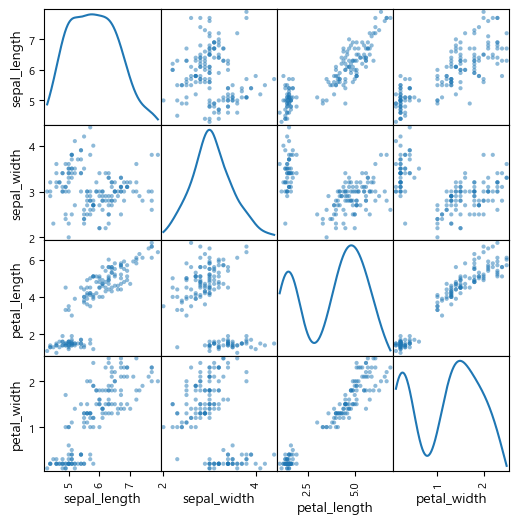

In [181]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris, alpha=0.5, figsize=(6,6), diagonal='kde')
plt.show()

### 3) 버블 플롯

- 산점도에서 x, y이외의 다른 변수를 포인트의 크기로 매핑하여 변수들간의 관계를 파악하게 함

### ① matplotlib.pyplot의 scatter()를 이용한 버블플롯 

- scatter()의 s 인수 사용

In [188]:
np.random.seed(100)

n=50
x=np.random.randn(n)
y=np.random.randn(n)
colors = np.random.rand(n)
area = (30 * np.random.rand(n))**2

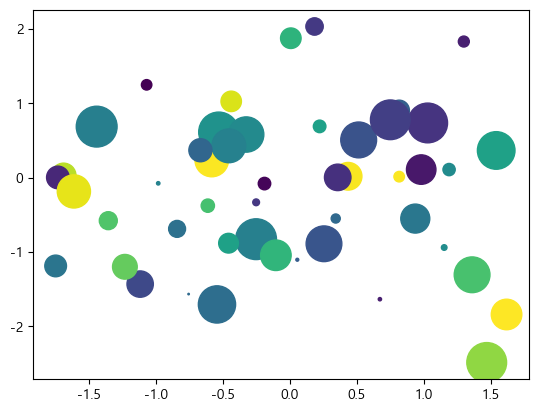

In [189]:
plt.scatter(x, y, c=colors, s=area)

In [191]:
area.min(), area.max()

(1.1423545950509586, 863.6963007915906)

#### iris datasets

In [197]:
iris.species[[49,50,100]]

49         setosa
50     versicolor
100     virginica
Name: species, dtype: object

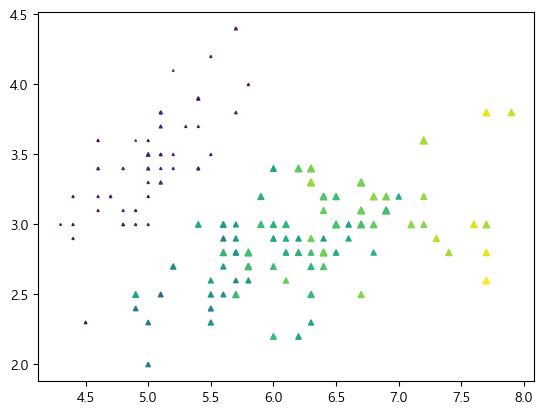

In [199]:
size = iris.petal_width * 10
plt.scatter(data=iris, x='sepal_length', y='sepal_width', 
            s=size, c='petal_length', marker='^')

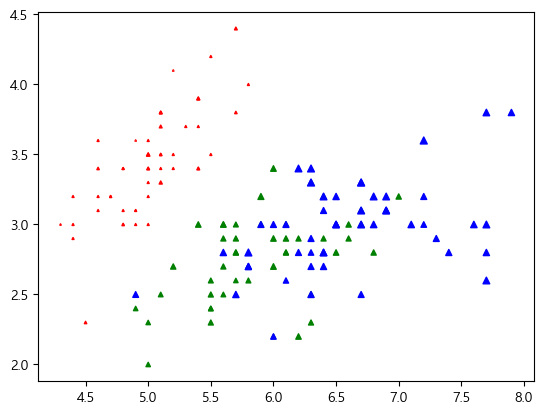

In [202]:
size = iris.petal_width * 10
color = ['r']*50 + ['g']*50 + ['b']*50
plt.scatter(data=iris, x='sepal_length', y='sepal_width', 
            s=size, c=color, marker='^')

### ② seaborn의 산점도 함수를 이용한 버블 플롯

- sns.scatterplot() 또는 relplot()의 size인수 사용

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

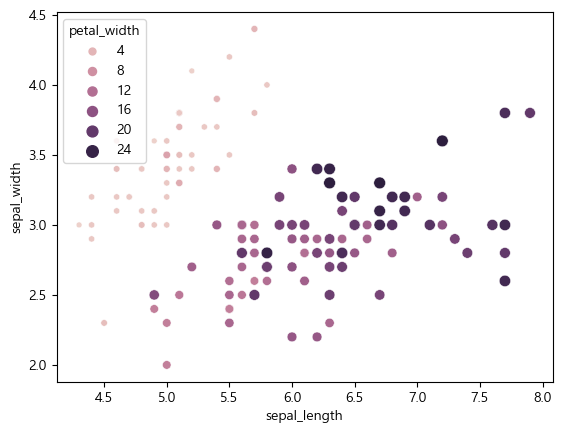

In [201]:
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue=size,
               size=size)

-----

## 3. 집단 간 비교

: 그룹별 데이터 분포 비교
- FacetGrid를 이용한 범주형 플롯 시각화
    

- 막대그래프(barplot)
    - matplotlib.pyplot.bar()
    - matplotlib.pyplot.barh()
    - DataFrame.plot(kind='bar'|'barh')
    - DataFrame.plot.bar()
    - DataFrame.plot.barh()
    - seaborn.barplot()
    - seaborn.catplot(kind='bar')


- 바이올린플롯(violin plot)
    - matplotlib.pyplot.violinplot()
    - seaborn.viloinplot()
    - seaborn.catplot(kind='violin')


- strip plot
    - seaborn.stripplot()
    - seaborn.catplot(kind='strip')
    
- swarm plot
    - seaborn.swarmplot()
    - seaborn.catplot(kind='swarm')

### 1) 막대 그래프(barplot)

- 범주형 데이터의 범주별 빈도 비교

In [203]:
titanic = sns.load_dataset('titanic')

In [204]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### ① matplotlib.pyplot의 막대그래프 함수

- 형식1
    - bar(x, height, width=0.8, bottom=None, align='center', data=None,...)
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
    
    
- 형식2
    - barh(y, width, height=0.8, left=None, *, align='center', **kwargs)
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html

In [205]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [207]:
survived = titanic.survived.value_counts()
survived

0    549
1    342
Name: survived, dtype: int64

([<matplotlib.axis.XTick at 0x2218a418e80>,
 [Text(0, 0, '사망'), Text(1, 0, '생존')])

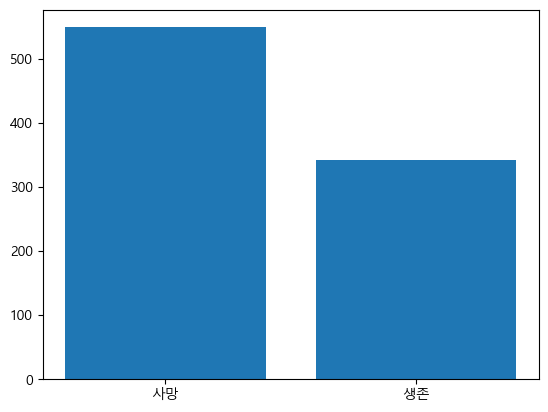

In [209]:
plt.bar(x=survived.index.astype('str'), height=survived.values)
plt.xticks([0,1],['사망','생존'])

<BarContainer object of 2 artists>

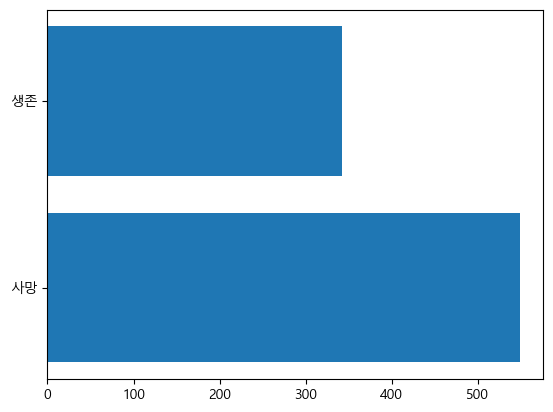

In [213]:
plt.barh(y=['사망','생존'], width=survived.values)

### ② seaborn의 막대그래프 함수

- 형식1
    - barplot(x=None, y=None, hue=None, data=None, order=None, orient='v'|'h', dodge=True, ...)
    - https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
    
    
- 형식2
    - catplot(kind='bar', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

### sns.barplot()

<AxesSubplot:xlabel='survived'>

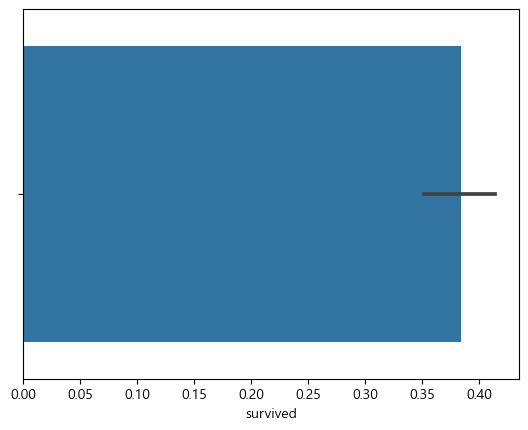

In [215]:
sns.barplot(data=titanic, x='survived')

- 성별 생존율

<AxesSubplot:xlabel='sex', ylabel='survived'>

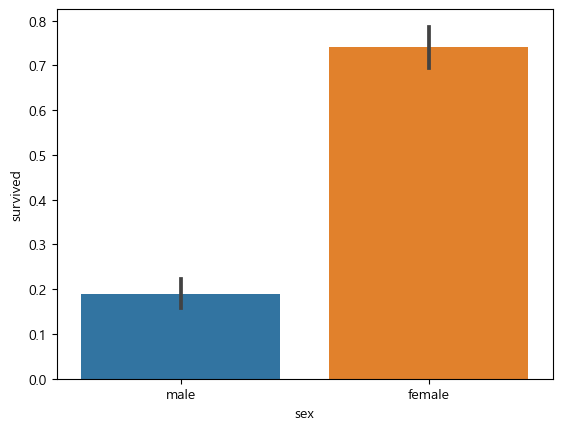

In [214]:
sns.barplot(data=titanic, x='sex', y='survived')

<AxesSubplot:xlabel='sex', ylabel='survived'>

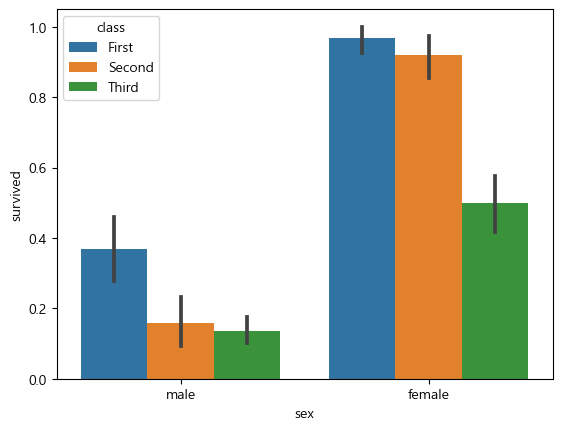

In [216]:
sns.barplot(data=titanic, x='sex', y='survived', hue='class')

<AxesSubplot:xlabel='class', ylabel='survived'>

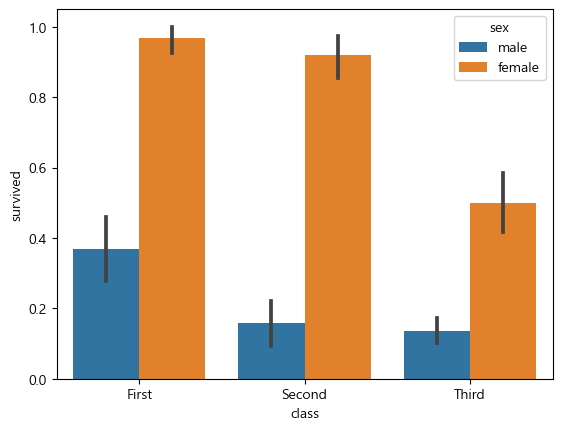

In [217]:
sns.barplot(data=titanic, x='class', y='survived', hue='sex')

- 누적막대그래프(stacked bar chart)

<AxesSubplot:xlabel='sex', ylabel='survived'>

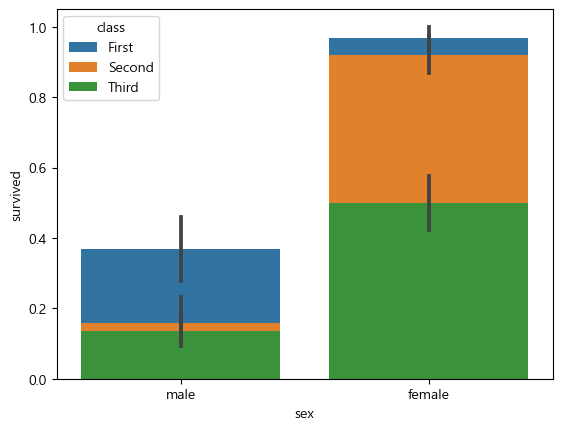

In [218]:
sns.barplot(data=titanic, x='sex', y='survived', hue='class', dodge=False)

### sns.catplot(kind='bar')

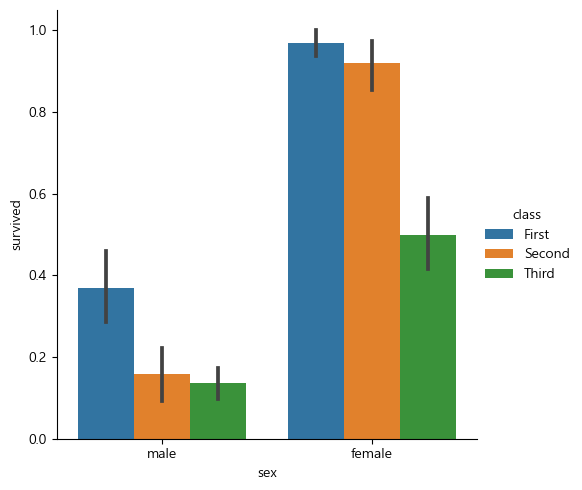

In [220]:
sns.catplot(kind='bar', data=titanic, x='sex', y='survived', hue='class')

#### catplot()의 col인수
- 윈도우에 범주별 막대그래프를 따로 표현

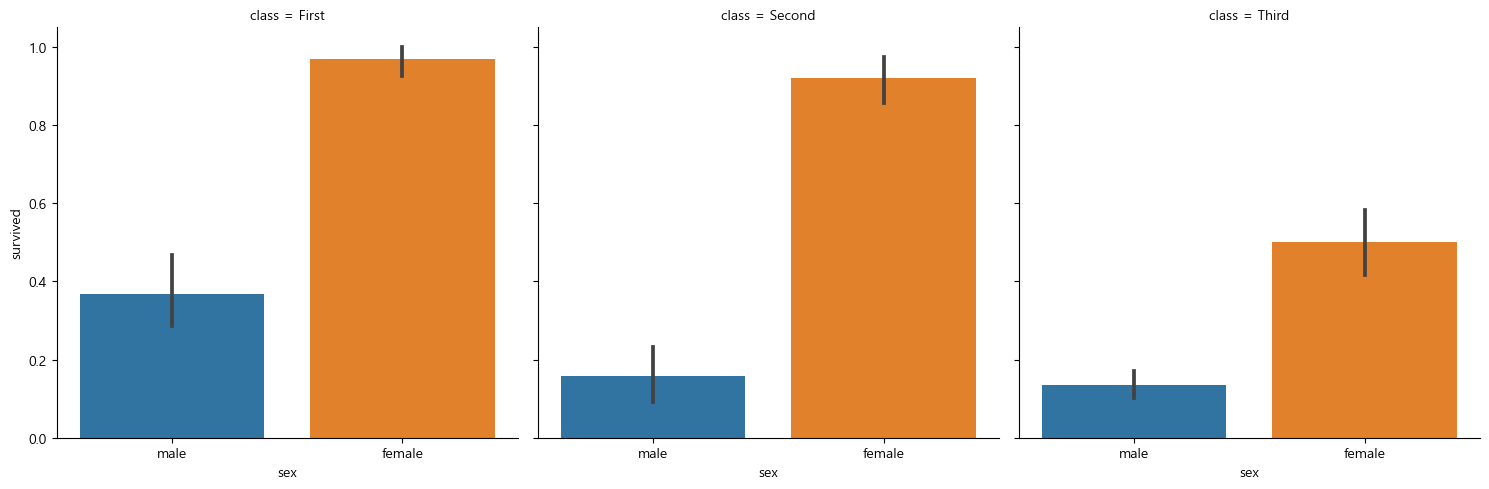

In [221]:
sns.catplot(kind='bar', data=titanic, x='sex', y='survived', col='class')

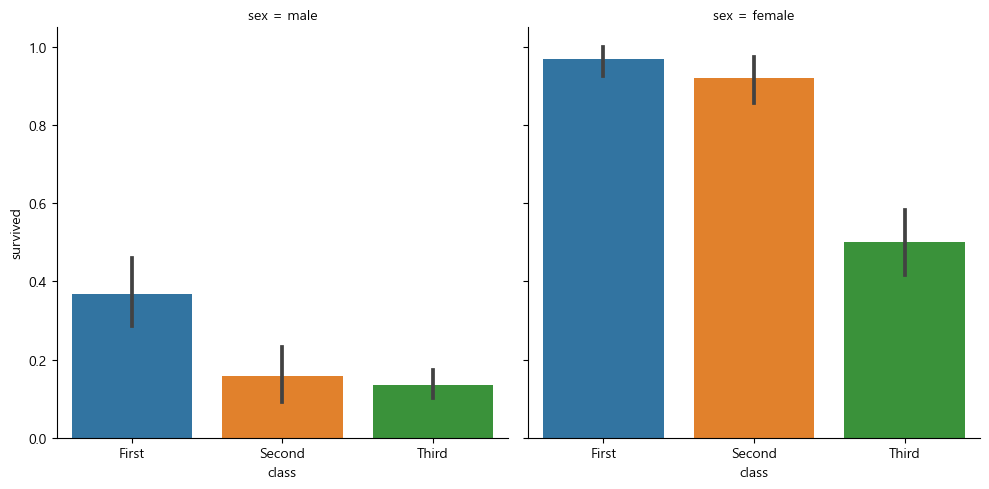

In [222]:
sns.catplot(kind='bar', data=titanic, x='class', y='survived', col='sex')

### 2) 바이올린 플롯

- 박스플롯의 기능과 함께 데이터의 커널밀도곡선을 제시
- 데이터의 분포와 범위를 한눈에 보기 쉽게 나타내는 그래프
- 더 실제에 가까운 분포를 알 수 있음

### ① matplotlib.pyplot의 바이올린 플롯 함수

- 형식
    - violinplot(dataset, positions=None, vert=True, widths=0.5,  *, data=None)
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html

In [224]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

{'bodies': [<matplotlib.collections.PolyCollection at 0x22188e8fb20>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x22188e8fb50>,
 'cmins': <matplotlib.collections.LineCollection at 0x22188e60bb0>,
 'cbars': <matplotlib.collections.LineCollection at 0x22188e606a0>}

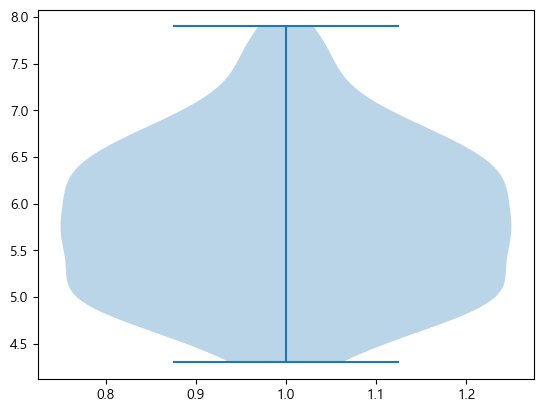

In [225]:
plt.violinplot(iris.sepal_length)

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

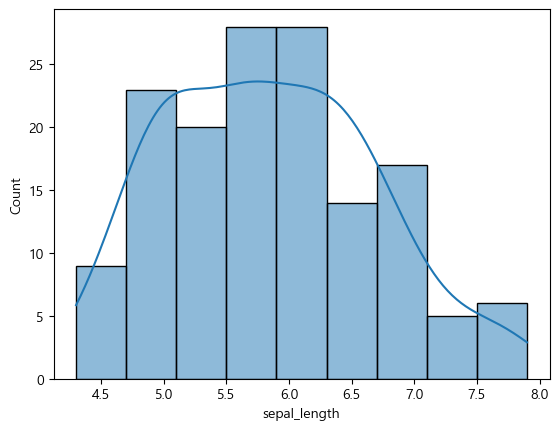

In [232]:
sns.histplot(data=iris, x='sepal_length', kde=True)

{'bodies': [<matplotlib.collections.PolyCollection at 0x2218880c610>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2218880c580>,
 'cmins': <matplotlib.collections.LineCollection at 0x2218880ccd0>,
 'cbars': <matplotlib.collections.LineCollection at 0x221888180d0>}

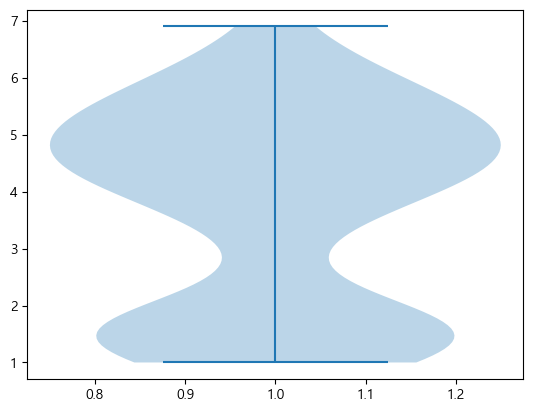

In [233]:
plt.violinplot(iris.petal_length)

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

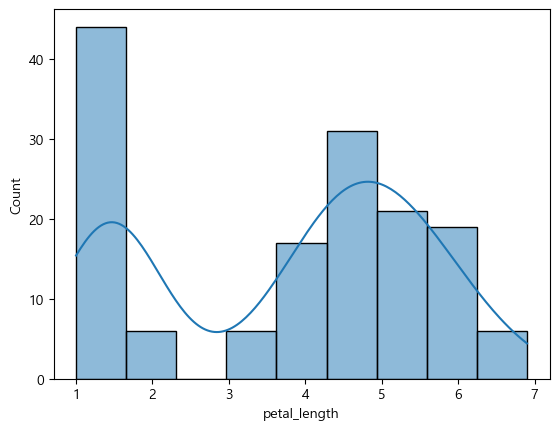

In [234]:
sns.histplot(data=iris, x='petal_length', kde=True)

{'bodies': [<matplotlib.collections.PolyCollection at 0x2218d627250>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x2218d627190>,
 'cmins': <matplotlib.collections.LineCollection at 0x2218d638520>,
 'cbars': <matplotlib.collections.LineCollection at 0x2218d638970>}

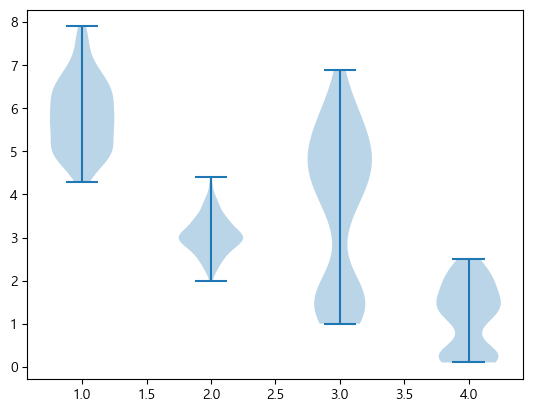

In [241]:
plt.violinplot(iris.iloc[:,:-1])

### ② seaborn의 바이올린 플롯 함수

- 형식1
    - violinplot(x=None, y=None, hue=None, data=None, order=None, ...)
    - https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot
    
    
- 형식2
    - catplot(kind='violin', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

### sns.violinplot()

<AxesSubplot:xlabel='sepal_length'>

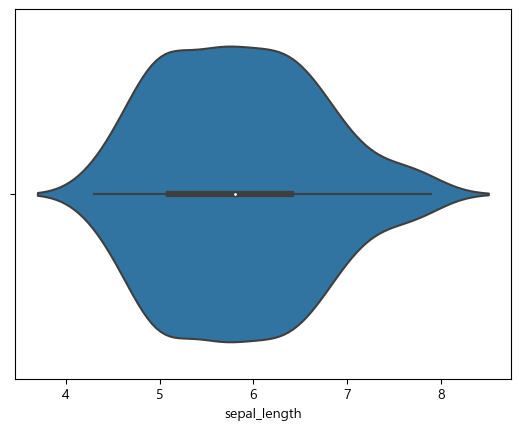

In [237]:
sns.violinplot(data=iris, x='sepal_length')

<AxesSubplot:ylabel='petal_length'>

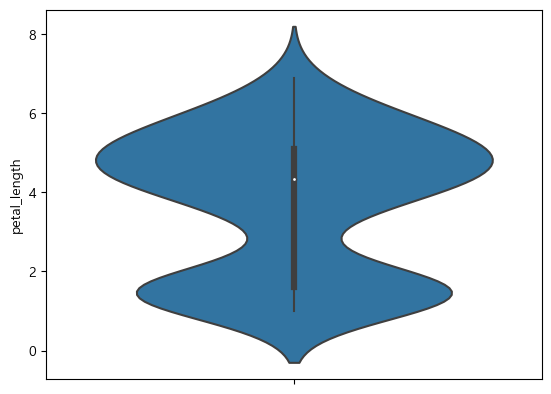

In [247]:
sns.violinplot(data=iris, y='petal_length')

<AxesSubplot:>

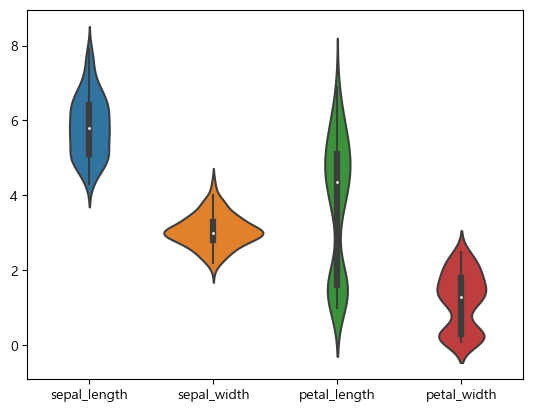

In [249]:
sns.violinplot(data=iris)

<AxesSubplot:>

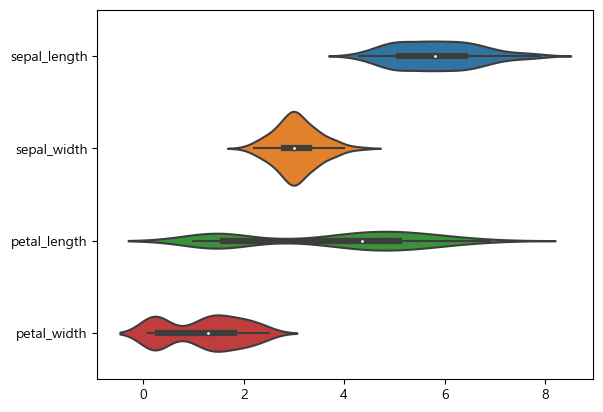

In [250]:
sns.violinplot(data=iris, orient='h')

<AxesSubplot:>

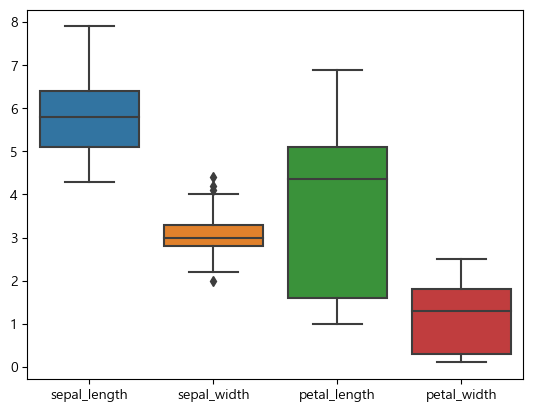

In [251]:
sns.boxplot(data=iris)

<AxesSubplot:>

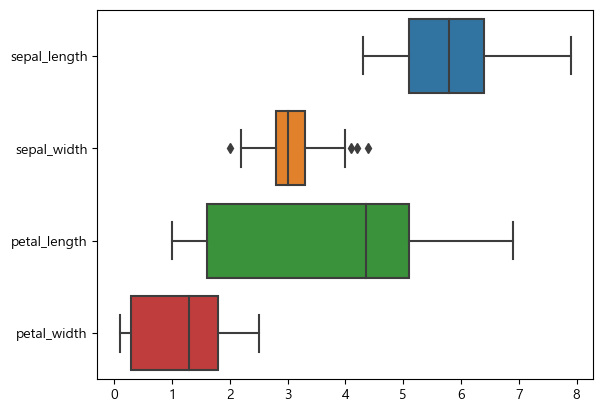

In [253]:
sns.boxplot(data=iris, orient='h')

### sns.catplot(kind='violin')

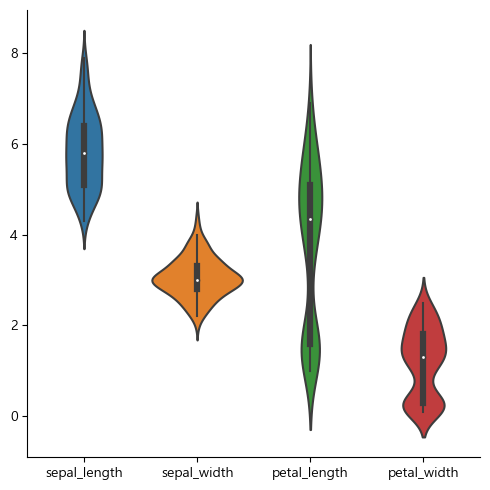

In [254]:
sns.catplot(kind='violin', data=iris)

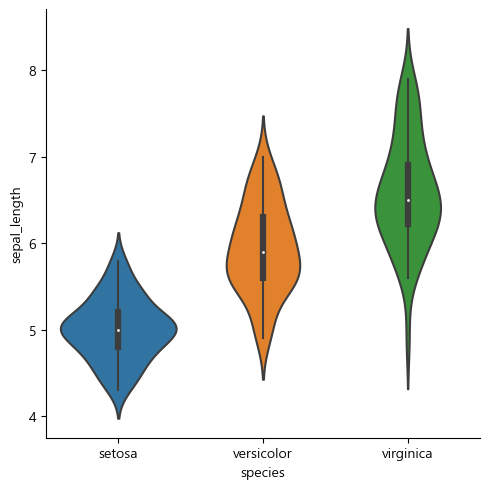

In [255]:
sns.catplot(kind='violin', data=iris, x='species', y='sepal_length')

### 3) Strip plot

- 겹치는 데이터를 파악할 수 있도록 같은 값에 jitter를 통해 겹치지 않게 그려주는 그래프

### seaborn의 strip plot 함수

- 형식1
    - stripplot(x=None, y=None, hue=None, data=None, order=None, jitter=True, ...)
    - https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot
    
    
- 형식2
    - catplot(kind='strip', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

### sns.stripplot()

<AxesSubplot:xlabel='sepal_length'>

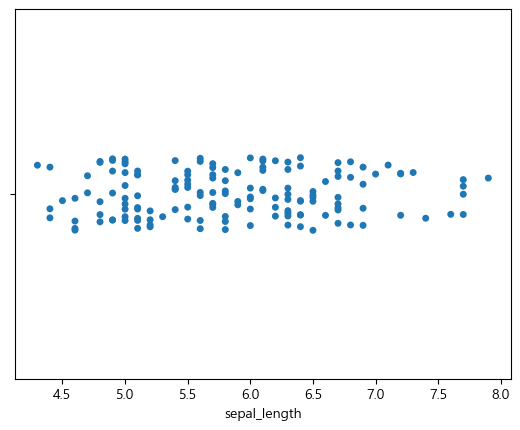

In [256]:
sns.stripplot(data=iris, x='sepal_length')

<AxesSubplot:xlabel='sepal_length'>

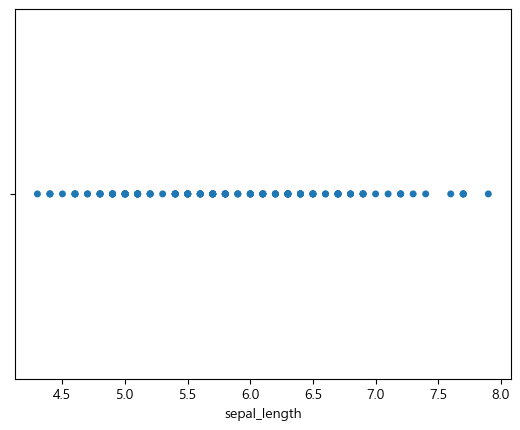

In [257]:
sns.stripplot(data=iris, x='sepal_length', jitter=False)

In [259]:
iris.sepal_length.value_counts().sort_index()

4.3     1
4.4     3
4.5     1
4.6     4
4.7     2
4.8     5
4.9     6
5.0    10
5.1     9
5.2     4
5.3     1
5.4     6
5.5     7
5.6     6
5.7     8
5.8     7
5.9     3
6.0     6
6.1     6
6.2     4
6.3     9
6.4     7
6.5     5
6.6     2
6.7     8
6.8     3
6.9     4
7.0     1
7.1     1
7.2     3
7.3     1
7.4     1
7.6     1
7.7     4
7.9     1
Name: sepal_length, dtype: int64

<AxesSubplot:xlabel='sepal_length', ylabel='species'>

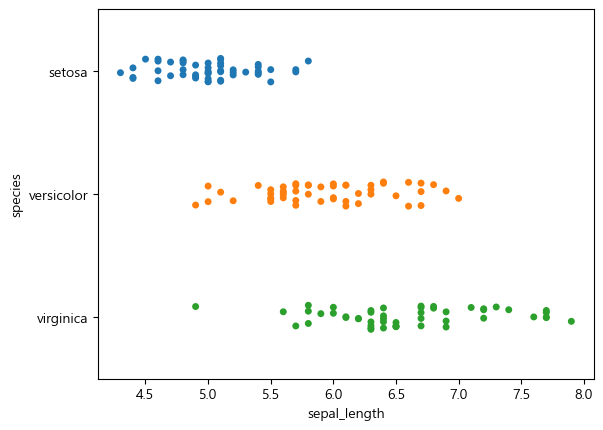

In [260]:
sns.stripplot(data=iris, x='sepal_length', y='species')

<AxesSubplot:xlabel='petal_length', ylabel='species'>

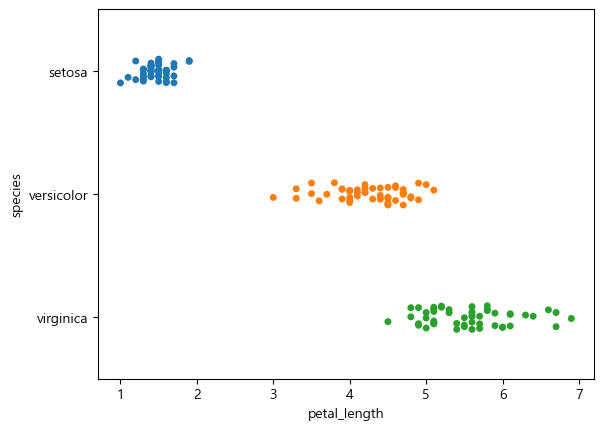

In [262]:
sns.stripplot(data=iris, x='petal_length', y='species')

### sns.catplot(kind='strip')

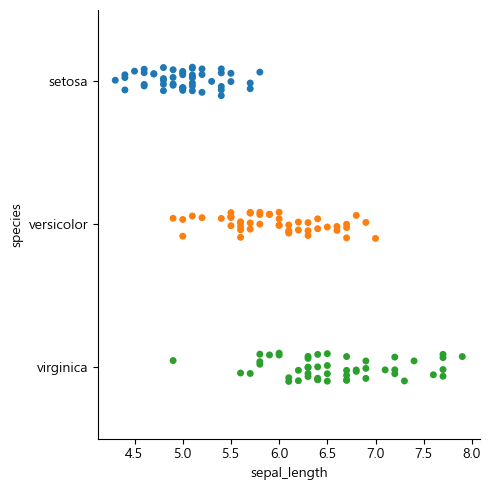

In [263]:
sns.catplot(kind='strip', data=iris, x='sepal_length', y='species')

### 4) Swarm plot

- 데이터의 분산까지 고려하여 겹치는 데이터를 겹치지 않게 그려주는 그래프
- 데이터가 퍼져 있는 정도를 입체적으로 볼 수 있음

### seaborn의 swarm plot 함수

- 형식1
    - swarmplot(x=None, y=None, hue=None, data=None, order=None, ...)
    - https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot
    
    
- 형식2
    - catplot(kind='swarm', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

<AxesSubplot:xlabel='sepal_length'>

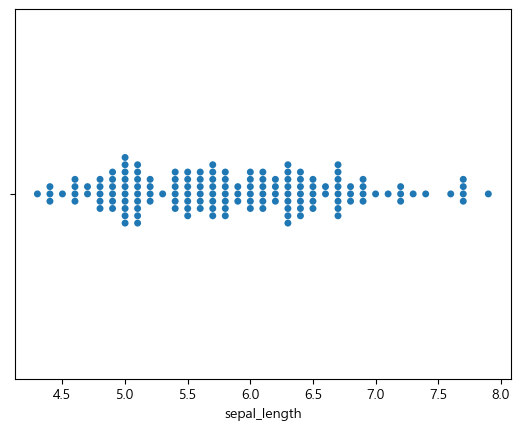

In [264]:
sns.swarmplot(data=iris, x='sepal_length')

<AxesSubplot:xlabel='petal_length', ylabel='species'>

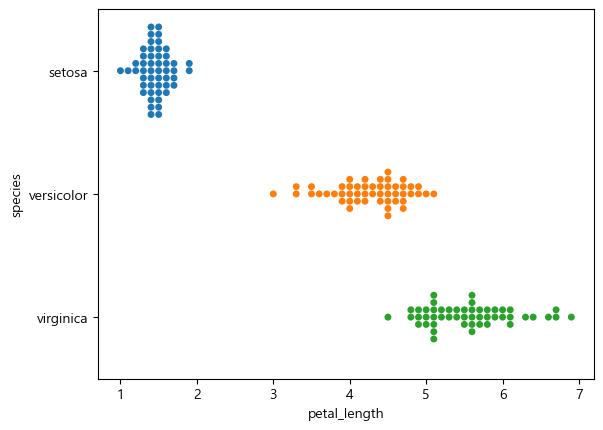

In [265]:
sns.swarmplot(data=iris, x='petal_length', y='species')

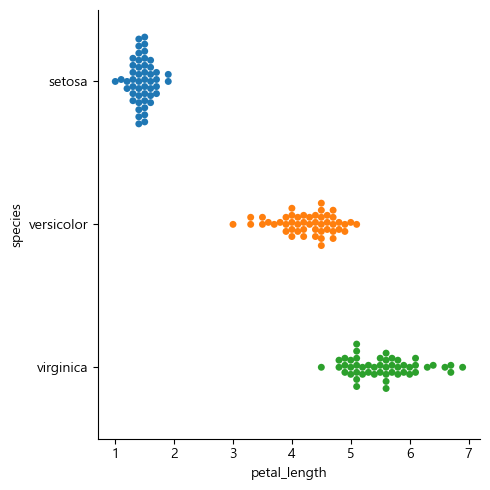

In [266]:
sns.catplot(kind='swarm',data=iris, x='petal_length', y='species')

#### box plot과 swarmplot을 같이 표시

<AxesSubplot:xlabel='petal_length', ylabel='species'>

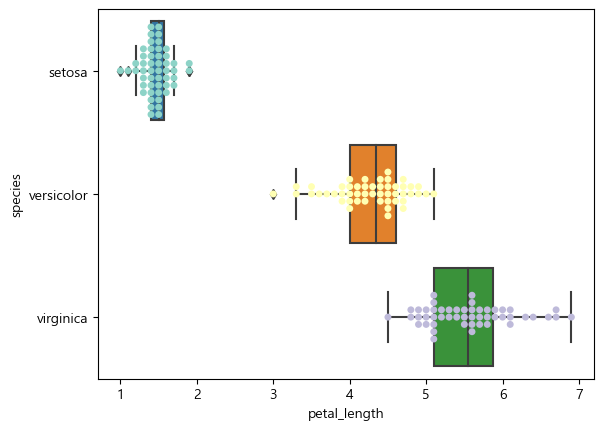

In [276]:
sns.boxplot(data=iris, x='petal_length', y='species')
sns.swarmplot(data=iris, x='petal_length', y='species', palette='Set3')

------

## 4. 시간에 따라 변화하는 데이터 표현

- 시계열 데이터 시각화
- 시간에 따른 추세 파악
- 선그래프(line plot)
    - matplotlib.pyplot.plot()
    - seaborn.lineplot()
    - seaborn.relplot(kind='line')
    - DataFrame.plot(kind='line')
    - DataFrame.plot.line()

### 예제 데이터

In [5]:
np.random.seed(123)
index = pd.date_range('2010-1-1', periods=100, freq='m', name='Date')
index

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31',
               '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
      

In [6]:
data = np.random.randn(100, 4).cumsum(axis=0)

In [7]:
df = pd.DataFrame(data, index=index, columns=['a','b','c','d'])
df.head()

a         b         c         d
Date                                              
2010-01-31 -1.085631  0.997345  0.282978 -1.506295
2010-02-28 -1.664231  2.648782 -2.143701 -1.935207
2010-03-31 -0.398295  1.782042 -2.822587 -2.029916
2010-04-30  1.093095  1.143140 -3.266569 -2.464268
2010-05-31  3.299025  3.329926 -2.262515 -2.078081

In [8]:
df.shape

(100, 4)

### 1) matplotlib의 plot()을 이용하여 라인플롯 그리기

- 형식 : plot(x, y, fmt, ..., data=None, scalex=True, scaley=True, **kwargs)
    - x, y : array-like or scalar
    - fmt : str, optional
 

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#

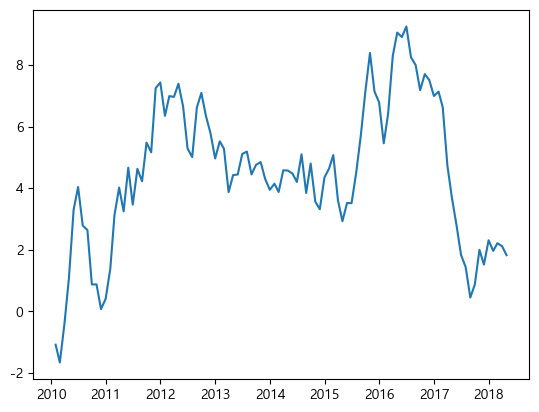

In [9]:
plt.plot(df.index, df.a)

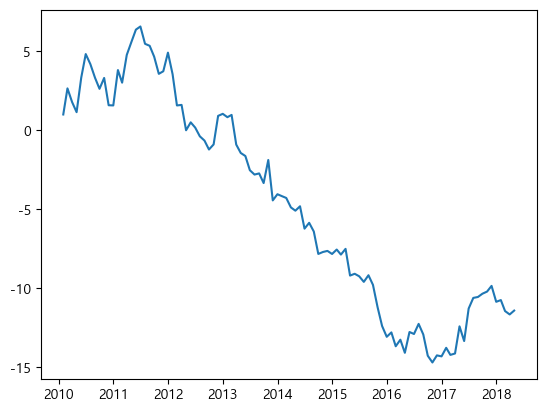

In [10]:
plt.plot(df.index, df.b)

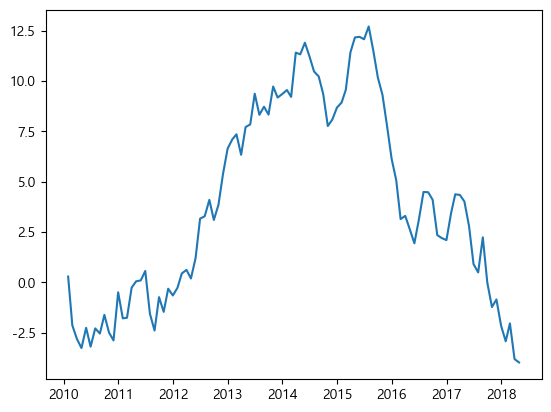

In [11]:
plt.plot(df.index, df.c)

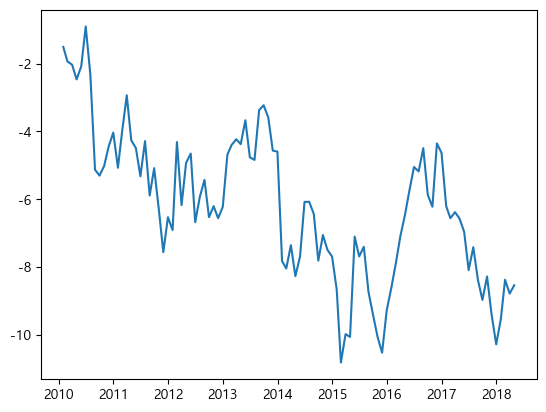

In [12]:
plt.plot(df.index, df.d)

#### plot()의 data 인수
- indexable object : If given, provide the label names to plot in x and y.

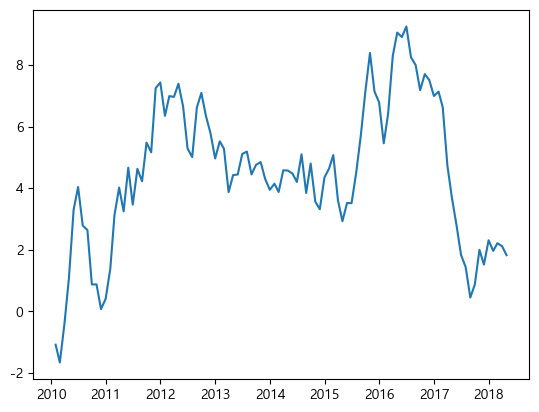

In [16]:
plt.plot( df.index, 'a', data=df)

C:\Users\a0106\AppData\Local\Temp\ipykernel_32452\4257809646.py:2: RuntimeWarning: Second argument 'b' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot( df.index, 'b', data=df)
C:\Users\a0106\AppData\Local\Temp\ipykernel_32452\4257809646.py:3: RuntimeWarning: Second argument 'c' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot( df.index, 'c', data=df)
C:\Users\a0106\AppData\Local\Temp\ipykernel_32452\4257809646.py:4: RuntimeWarning: Second argument 'd' is ambiguous: could be a format string 

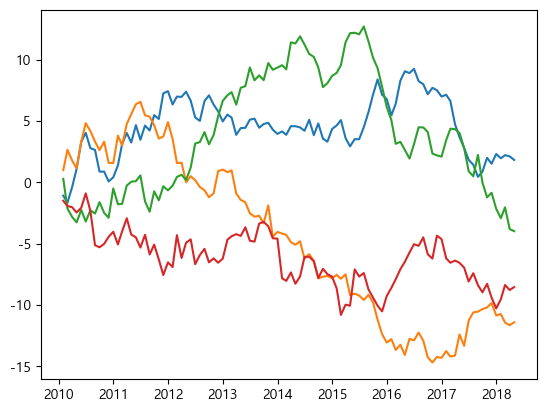

In [19]:
plt.plot( df.index, 'a', data=df)
plt.plot( df.index, 'b', data=df)
plt.plot( df.index, 'c', data=df)
plt.plot( df.index, 'd', data=df)

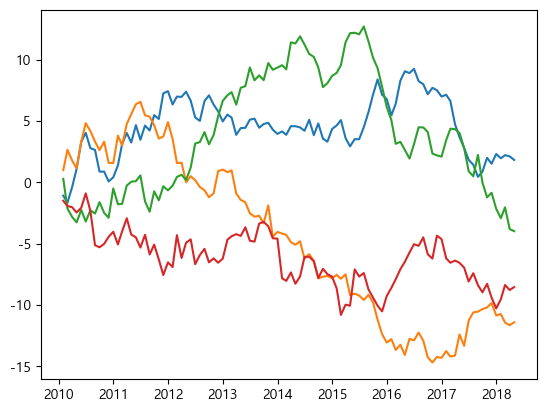

In [20]:
plt.plot( df.index, df.a)
plt.plot( df.index, df.b)
plt.plot( df.index, df.c)
plt.plot( df.index, df.d)

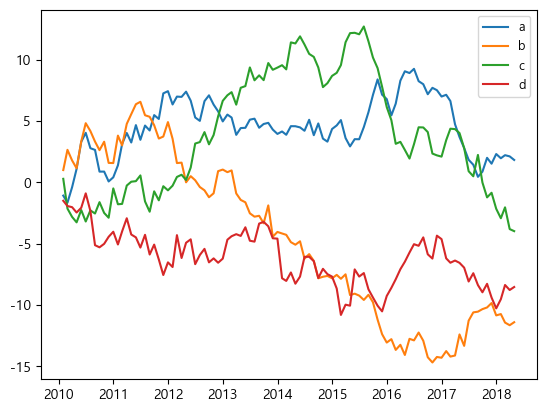

In [21]:
plt.plot( df.index, df.a)
plt.plot( df.index, df.b)
plt.plot( df.index, df.c)
plt.plot( df.index, df.d)
plt.legend(labels=['a','b','c','d'], fontsize=9)

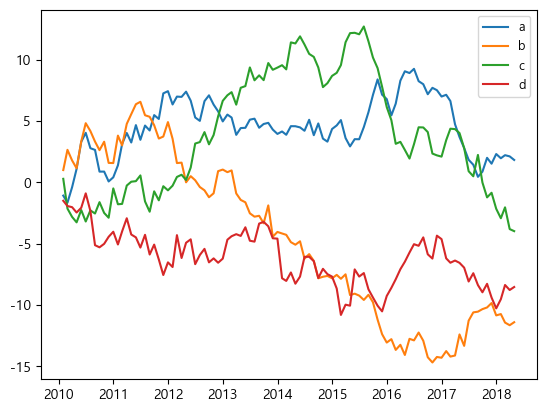

In [22]:
plt.plot( df.index, df.a, df.index, df.b, df.index, df.c, df.index, df.d)
plt.legend(labels=['a','b','c','d'], fontsize=9)

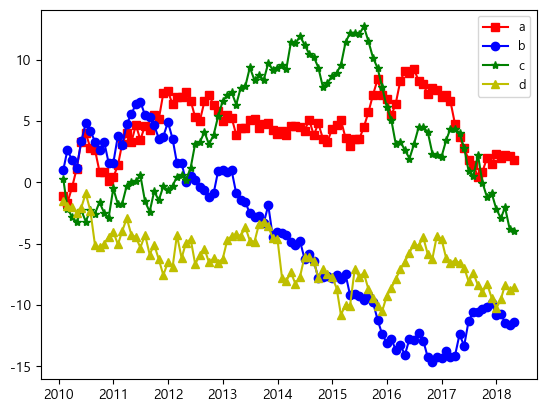

In [27]:
plt.plot( df.index, df.a, marker='s', color='r')
plt.plot( df.index, df.b, marker='o', color='b')
plt.plot( df.index, df.c,marker='*', color='g')
plt.plot( df.index, df.d, marker='^', color='y')
plt.legend(labels=['a','b','c','d'], fontsize=9)

#### plot()의 fmt인수

- 색상과 마커 모양, 선의 모양 등을 약어로 지정
- 예. 'ro' : color='red', marker='circle', linestyle='solid'

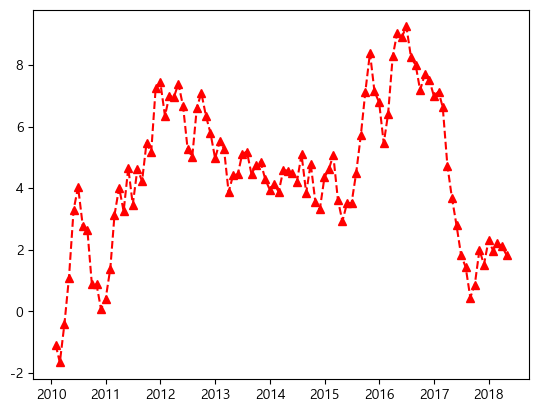

In [26]:
plt.plot( df.index, df.a, 'r^--')

### 2) seaborn의 선그래프 함수 이용

- 형식1.
    - lineplot(* , x=None, y=None, hue=None, size=None, style=None, data=None, palette=None,...)
    - https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot
    
    
- 형식2.
    - relplot(kind='line', x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

### sns.lineplot()

<AxesSubplot:xlabel='Date', ylabel='a'>

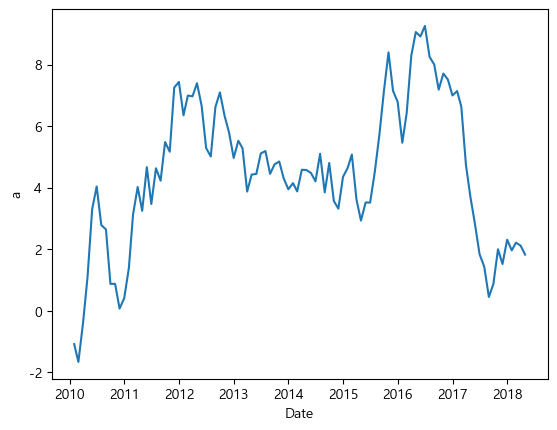

In [28]:
sns.lineplot(data=df, x=df.index, y='a')

Text(0.5, 1.0, 'Time Series')

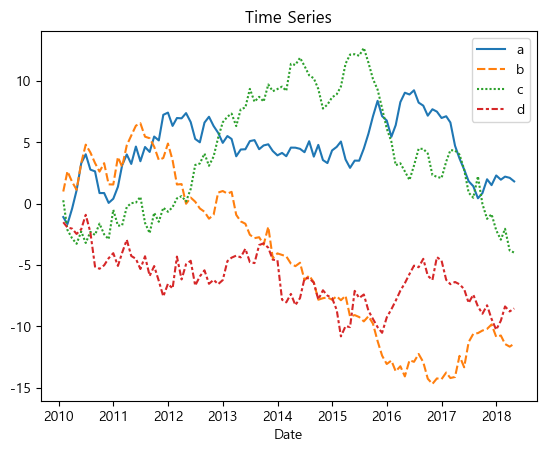

In [30]:
ax = sns.lineplot(data=df)
ax.set_title('Time Series')

#### seaborn의 set_style() 이용하여 라인플롯 그리기

<AxesSubplot:xlabel='Date'>

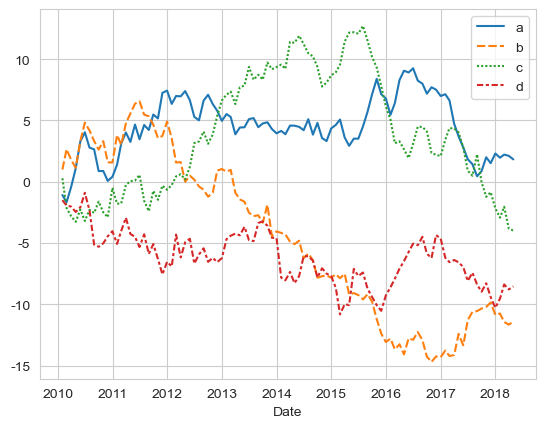

In [32]:
sns.set_style('whitegrid')
sns.lineplot(data=df)

<AxesSubplot:xlabel='Date'>

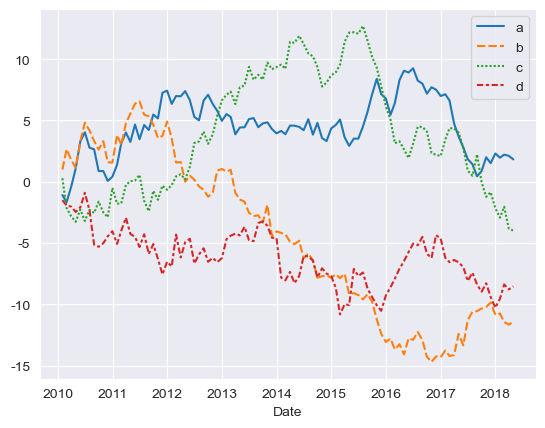

In [33]:
sns.set_style('darkgrid')
sns.lineplot(data=df)

**sns.despine() 함수를 이용한 그림 테두리 제거**

: sns.despine(right=True,left=True,top=False,bottom=False)

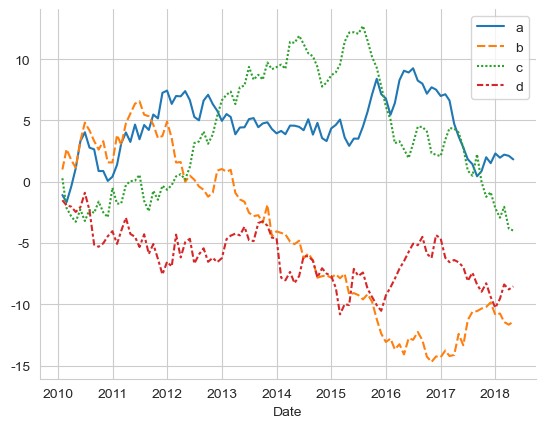

In [35]:
sns.set_style('whitegrid')
sns.lineplot(data=df)
sns.despine(right=True, top=True)

### 3) pandas.DataFrame.plot(kind='line') 이용

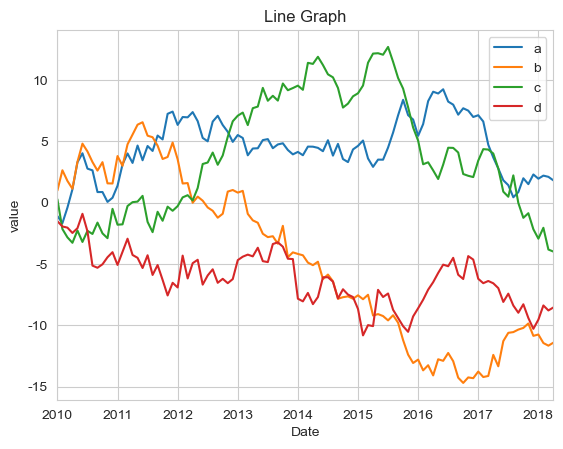

In [39]:
# df.plot()
df.plot.line()
plt.title('Line Graph')
plt.ylabel('value')
plt.show()

------------------------------------------------

## 5. 히트맵(heatmap)

### (1) seaborn의 heatmap() 함수 사용

- 범주형-범주형-수치형 자료의 시각화
    - X축과 Y축에 2개의 범주형 자료의 계급(class)별로 연속형 자료를 집계한 자료의 시각화
- 집계한 값에 비례하여 색깔을 다르게 해서 2차원으로 자료를 시각화


- 형식 : heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)


- https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

### 예제 데이터1.
- 캐글 자전거수요예측 데이터
- https://www.kaggle.com/competitions/bike-sharing-demand

In [40]:
bike = pd.read_csv('data/bike.csv')

In [41]:
bike.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 0:00       1        0           0        1  9.84  14.395   
1  2011-01-01 1:00       1        0           0        1  9.02  13.635   
2  2011-01-01 2:00       1        0           0        1  9.02  13.635   
3  2011-01-01 3:00       1        0           0        1  9.84  14.395   
4  2011-01-01 4:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [42]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- datetime : hourly date + timestamp (날짜와 시간)

- season : 1 = spring, 2 = summer, 3 = fall, 4 = winter (계절)

- holiday : whether the day is considered a holiday (휴일)

- workingday ; whether the day is neither a weekend nor holiday (평일)

- weather
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy (맑은 날씨)
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (안개)
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (가벼운 눈, 비)
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (폭설, 폭우)

- temp : temperature in Celsius (온도)

- atemp : “feels like” temperature in Celsius (체감 온도)

- humidity : relative humidity (상대 습도)

- windspeed : wind speed (풍속)

- casual : number of non-registered user rentals initiated (비회원 대여량)

- registered : number of registered user rentals initiated (회원 대여량)

- count : number of total rentals (총 대여량)

In [44]:
bike['datetime'] = pd.to_datetime(bike.datetime)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [45]:
bike['hour'] = bike.datetime.dt.hour
bike.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour  
0        81        0.0       3          13     16     0  
1        80        0.0       8          32     40     1  
2        80        0.0       5          27     32     2  
3        75        0.0       3          10     13     3  
4        75        0.0       0           1      1     4

In [49]:
bike['month'] = bike.datetime.dt.month
bike.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour  month  
0        81        0.0       3          13     16     0      1  
1        80        0.0       8          32     40     1      1  
2        80        0.0       5          27     32     2      1  
3        75        0.0       3          10     13     3      1  
4        75        0.0       0           1      1     4      1

In [50]:
bike.tail()

datetime  season  holiday  workingday  weather   temp  \
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  hour  month  
10881  19.695        50    26.0027       7         329    336    19     12  
10882  17.425        57    15.0013      10         231    241    20     12  
10883  15.910        61    15.0013       4         164    168    21     12  
10884  17.425        61     6.0032      12         117    129    22     12  
10885  16.665        66     8.9981       4          84     88    23     12

In [51]:
bike.shape

(10886, 14)

#### sns.heatmap() 사용하여 계절(season)과 시간대별(hours) 자전거  총대여량 시각화

#### 데이터 피봇팅

- pivot() 함수
    - 형식1. pd.pivot(data, index=None, columns=None, values=None)
    - 형식2. 데이터프레임.pivot(index=None, columns=None, values=None)
    - https://pandas.pydata.org/docs/reference/api/pandas.pivot.html
    
    
- pivot_table() 함수
    - 형식1. pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True) 
    - 형식2. 데이터프레임.pivot_table( )
    - https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

계절(season)과 시간대별(hour) 자전거  총대여량

In [52]:
pd.pivot_table(data=bike, values='count', index='season', columns='hour', aggfunc='sum')

hour      0     1     2     3    4     5      6      7      8      9   ...  \
season                                                                 ...   
1       3197  2120  1413   745  337  1133   4828  14061  28628  17452  ...   
2       6666  4063  2677  1312  749  2323   9460  26478  44482  27394  ...   
3       8627  5066  3583  1783  922  2933  11033  30100  46000  28581  ...   
4       6598  4123  2586  1251  824  2546   9377  26329  45950  27483  ...   

hour       14     15     16     17     18     19     20     21     22     23  
season                                                                        
1       17244  18136  21505  32314  29430  20100  14181  10864   8312   5168  
2       31003  32537  40944  61596  56947  42401  30469  22719  17578  11592  
3       32644  33625  42331  64454  61454  47139  35094  26906  20610  13876  
4       30119  31662  39486  55393  48641  34127  24460  18568  14411  10180  

[4 rows x 24 columns]

In [54]:
bike_cnt = pd.pivot_table(data=bike, values='count', columns='season', index='hour', aggfunc='sum')
bike_cnt

season      1      2      3      4
hour                              
0        3197   6666   8627   6598
1        2120   4063   5066   4123
2        1413   2677   3583   2586
3         745   1312   1783   1251
4         337    749    922    824
5        1133   2323   2933   2546
6        4828   9460  11033   9377
7       14061  26478  30100  26329
8       28628  44482  46000  45950
9       17452  27394  28581  27483
10      11545  21971  24913  21238
11      13854  27255  29284  25464
12      17603  32607  35000  31758
13      18328  33059  34704  31460
14      17244  31003  32644  30119
15      18136  32537  33625  31662
16      21505  40944  42331  39486
17      32314  61596  64454  55393
18      29430  56947  61454  48641
19      20100  42401  47139  34127
20      14181  30469  35094  24460
21      10864  22719  26906  18568
22       8312  17578  20610  14411
23       5168  11592  13876  10180

In [55]:
type(bike_cnt)

pandas.core.frame.DataFrame

In [57]:
bike_cnt.max().max()

64454

- heatmap()의 색상 스케일 최소값(vmin), 최대값(vmax) 인수 사용

<AxesSubplot:xlabel='season', ylabel='hour'>

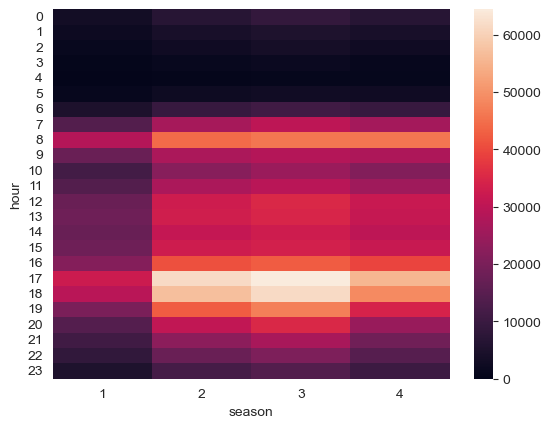

In [59]:
sns.heatmap(bike_cnt, vmin=0, vmax=bike_cnt.max().max())

#### heatmap()의 annot, fmt 인수
- annot=True : 히트맵의 각 셀에 값 표시
- fmt='d' or 'f' : 히트맵에 표시하는 값의 서식(format) 지정 (정수, 실수)

<AxesSubplot:xlabel='season', ylabel='hour'>

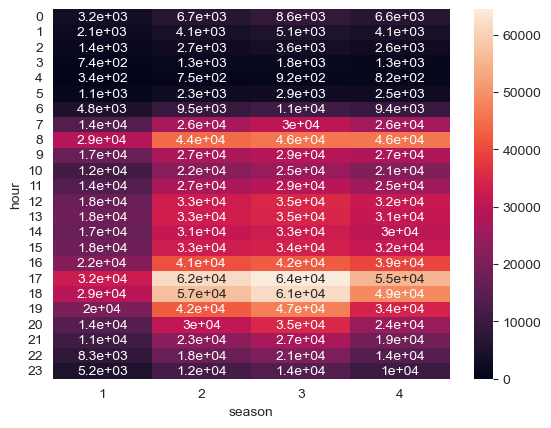

In [60]:
sns.heatmap(bike_cnt, vmin=0, vmax=bike_cnt.max().max(), annot=True)

<AxesSubplot:xlabel='season', ylabel='hour'>

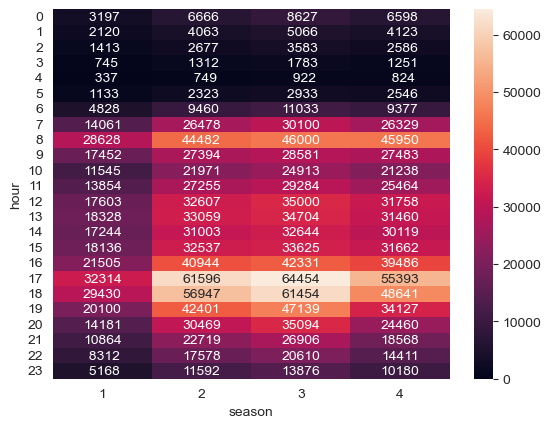

In [62]:
sns.heatmap(bike_cnt, vmin=0, vmax=bike_cnt.max().max(), annot=True, fmt='5d')

#### sns.heatmap()함수의 cmap인수 사용하여 다른 color map 지정

- color maps in Matplotlib 링크 참고: 
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

<AxesSubplot:xlabel='season', ylabel='hour'>

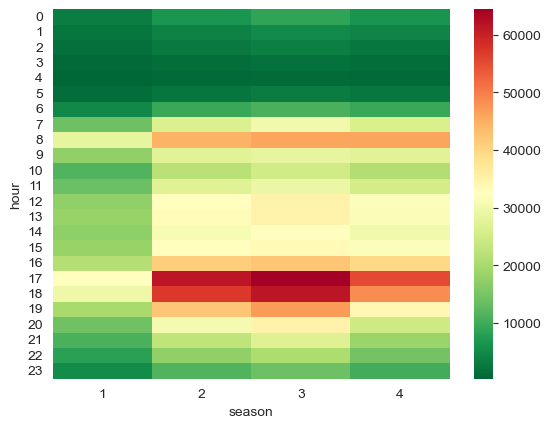

In [64]:
sns.heatmap(bike_cnt, cmap='RdYlGn_r')

<AxesSubplot:xlabel='season', ylabel='hour'>

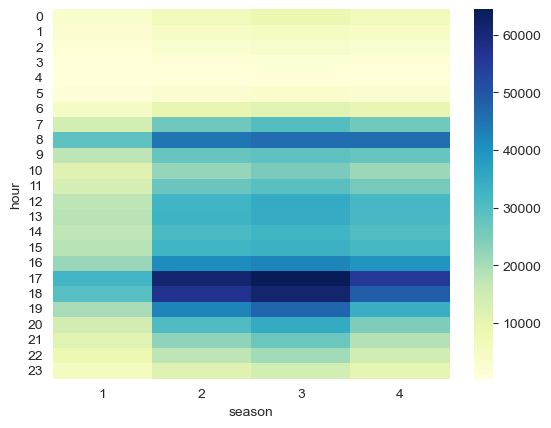

In [65]:
sns.heatmap(bike_cnt, cmap='YlGnBu')

### 문제. 

#### 1. 주중여부와 시간대에 따른 자전거 총 대여건수에 대한 히트맵 그리기

In [85]:
bike_wh = pd.pivot_table(data=bike, index = 'hour', columns='workingday', values='count', aggfunc='sum')
bike_wh = bike_wh.rename(columns={0:'주말',1:'주중'})
bike_wh.head()

workingday     주말     주중
hour                    
0           13701  11387
1           10427   4945
2            7686   2573
3            3677   1414
4            1239   1593

<AxesSubplot:xlabel='workingday', ylabel='hour'>

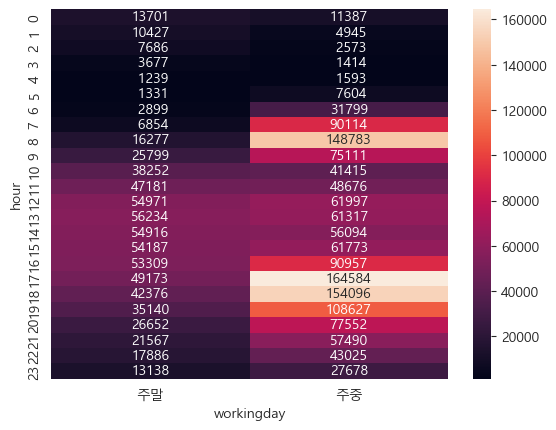

In [82]:
sns.heatmap(bike_wh,annot=True, fmt='5d')

#### 2. 주중여부와 계절에 따른 자전거 총 대여건수에 대한 히트맵 그리기

In [78]:
bike_ws = pd.pivot_table(data=bike, index = 'season', columns='workingday', values='count', aggfunc='sum')
bike_ws = bike_ws.rename(index = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}, columns={0:'주말',1:'주중'})
bike_ws

workingday      주말      주중
season                    
spring       90714  221784
summer      187062  401220
fall        206478  434184
winter      170618  373416

<AxesSubplot:xlabel='workingday', ylabel='season'>

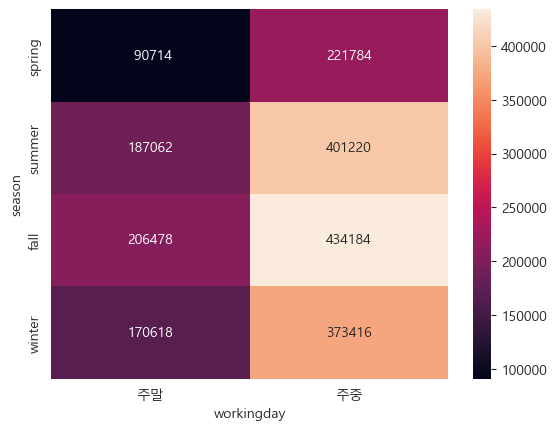

In [84]:
sns.heatmap(bike_ws, annot=True, fmt='6d')

#### 3. 월별과 시간대에 따른 자전거 총 대여건수에 대한 히트맵 그리기

In [86]:
bike_ms = pd.pivot_table(data=bike, index = 'hour', columns='month', values='count', aggfunc='sum')
bike_ms.head()

month   1     2     3     4     5     6     7     8     9     10    11    12
hour                                                                        
0      852  1096  1249  1480  2441  2745  3269  2678  2680  2532  2122  1944
1      611   642   867   901  1481  1681  1863  1600  1603  1408  1407  1308
2      468   461   484   646   965  1066  1321  1042  1220   833   815   938
3      248   198   299   346   459   507   592   510   681   433   390   428
4      110    87   140   174   259   316   307   317   298   299   283   242

<AxesSubplot:xlabel='month', ylabel='hour'>

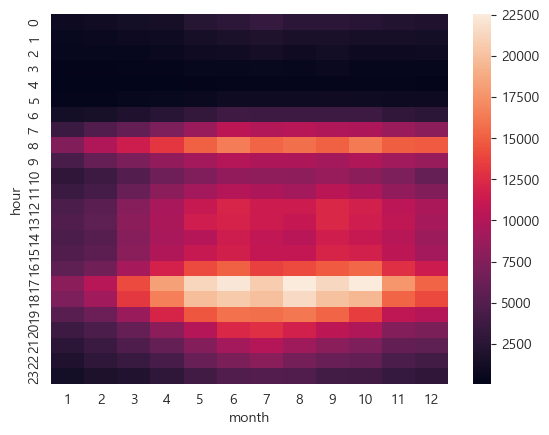

In [81]:
sns.heatmap(bike_ms)

### (2) matplotlib의 pcolor()를 이용한 heatmap 그리기

In [ ]:
n = len(bike_cnt.columns)
n

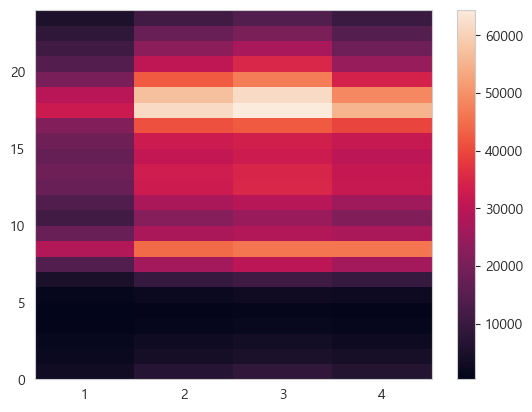

In [91]:
plt.pcolor(bike_cnt)
plt.colorbar()
plt.xticks(np.arange(0.5, n ,1), bike_cnt.columns)
plt.show()

------------------------------------------

### 예제 데이터2
- seaborn 패키지의 flights dataset

In [95]:
fly = sns.load_dataset('flights')
fly.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [94]:
fly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [96]:
fly.tail()

year month  passengers
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

**heatmap을 그리기 위한 데이터 테이블 생성**
- pivot 테이블을 이용해서 연도별 각 월 승객수로 구조를 변환

In [108]:
fly_cnt = pd.pivot(data=fly, columns='year', index='month', values='passengers')
fly_cnt

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   310   362   390
Dec     118   140   166   194   201   229   278   306   336   337   405   432

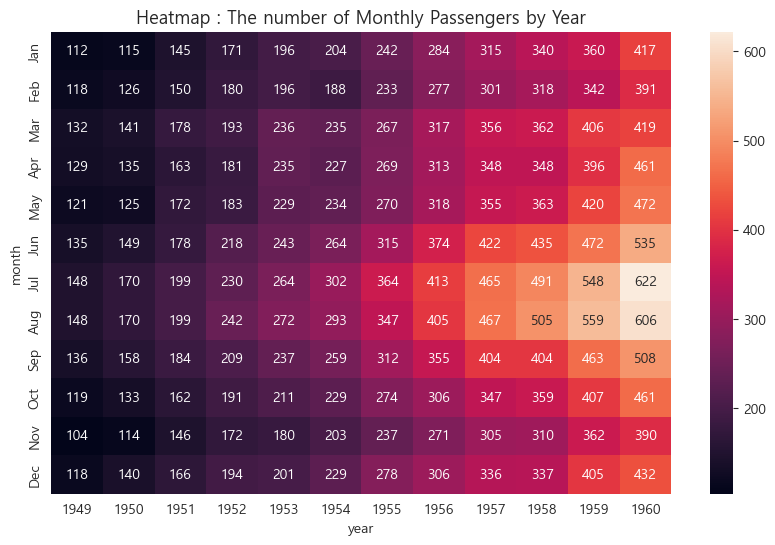

In [109]:
plt.figure(figsize=(10,6))
sns.heatmap(fly_cnt, annot=True, fmt='3d')
plt.title('Heatmap : The number of Monthly Passengers by Year', fontsize=13)
plt.show()

**seaborn.heatmap() 그리기**

----------------------------------------------------